In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# Set style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


# MAC


## Single thread

In [6]:
## Compiler flags
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

# Set style
plt.style.use('ggplot')
sns.set_palette("colorblind")

# Parse the complex CSV format to extract data
data_raw = """Grid Size,Flag,Average Time (ms),Performance (MCUPS),Memory Usage (KB)
200,-O0,0.486901
0.494964
0.494546
0.492137,8.12829e+07,276
200,-O1,0.0689932
0.0676804
0.0674156
0.0680297,5.88038e+08,213.333
200,-O2,0.030969
0.0307051
0.0305152
0.0307298,1.30172e+09,213.333
200,-O3,0.0169044
0.0165686
0.016373
0.0166153,2.40783e+09,213.333
200,-Ofast,0.0169543
0.0164391
0.016765
0.0167195,2.39281e+09,213.333
500,-O0,3.0875
3.10293
3.03594
3.07546,8.12958e+07,1385.33
500,-O1,0.416815
0.420663
0.416687
0.418055,5.98019e+08,1322.67
500,-O2,0.192898
0.190104
0.192801
0.191934,1.30259e+09,1322.67
500,-O3,0.113931
0.113226
0.109863
0.11234,2.22594e+09,1322.67
500,-Ofast,0.113604
0.114196
0.111849
0.113216,2.20833e+09,1322.67
1000,-O0,12.4453
12.4526
12.4134
12.4371,8.04049e+07,5310.67
1000,-O1,1.758
1.74377
1.72102
1.74093,5.74449e+08,5248
1000,-O2,0.843696
0.83009
0.828192
0.833993,1.19913e+09,5248
1000,-O3,0.540882
0.567711
0.549615
0.552736,1.80992e+09,5248
1000,-Ofast,0.521717
0.567904
0.750541
0.613387,1.66999e+09,5248"""

# Regular expression to parse each section
pattern = r"(\d+),(-O\w+),([\d.\n]+),([\d.e+]+),(\d+\.?\d*)"

# Extract data using regular expressions
data_extracted = re.findall(pattern, data_raw)

# Create clean data structure
data = {
    'Grid Size': [],
    'Flag': [],
    'Average Time (ms)': [],
    'Performance (MCUPS)': [],
    'Memory Usage (KB)': []
}

for match in data_extracted:
    grid_size = int(match[0])
    flag = match[1]
    # Take the last time value as the average (the 4th measurement)
    time_values = [float(t) for t in match[2].strip().split('\n')]
    avg_time = time_values[-1]
    
    # Convert performance from scientific notation to regular float
    performance = float(match[3])
    # Convert to MCUPS (Millions of Cell Updates Per Second) from raw value
    performance_mcups = performance / 1e6
    
    memory = float(match[4])
    
    data['Grid Size'].append(grid_size)
    data['Flag'].append(flag)
    data['Average Time (ms)'].append(avg_time)
    data['Performance (MCUPS)'].append(performance_mcups)
    data['Memory Usage (KB)'].append(memory)

# Create DataFrame
df = pd.DataFrame(data)

print("Data successfully parsed:")
print(df)



Data successfully parsed:
    Grid Size    Flag  Average Time (ms)  Performance (MCUPS)  \
0         200     -O0           0.492137              81.2829   
1         200     -O1           0.068030             588.0380   
2         200     -O2           0.030730            1301.7200   
3         200     -O3           0.016615            2407.8300   
4         200  -Ofast           0.016720            2392.8100   
5         500     -O0           3.075460              81.2958   
6         500     -O1           0.418055             598.0190   
7         500     -O2           0.191934            1302.5900   
8         500     -O3           0.112340            2225.9400   
9         500  -Ofast           0.113216            2208.3300   
10       1000     -O0          12.437100              80.4049   
11       1000     -O1           1.740930             574.4490   
12       1000     -O2           0.833993            1199.1300   
13       1000     -O3           0.552736            1809.9200   

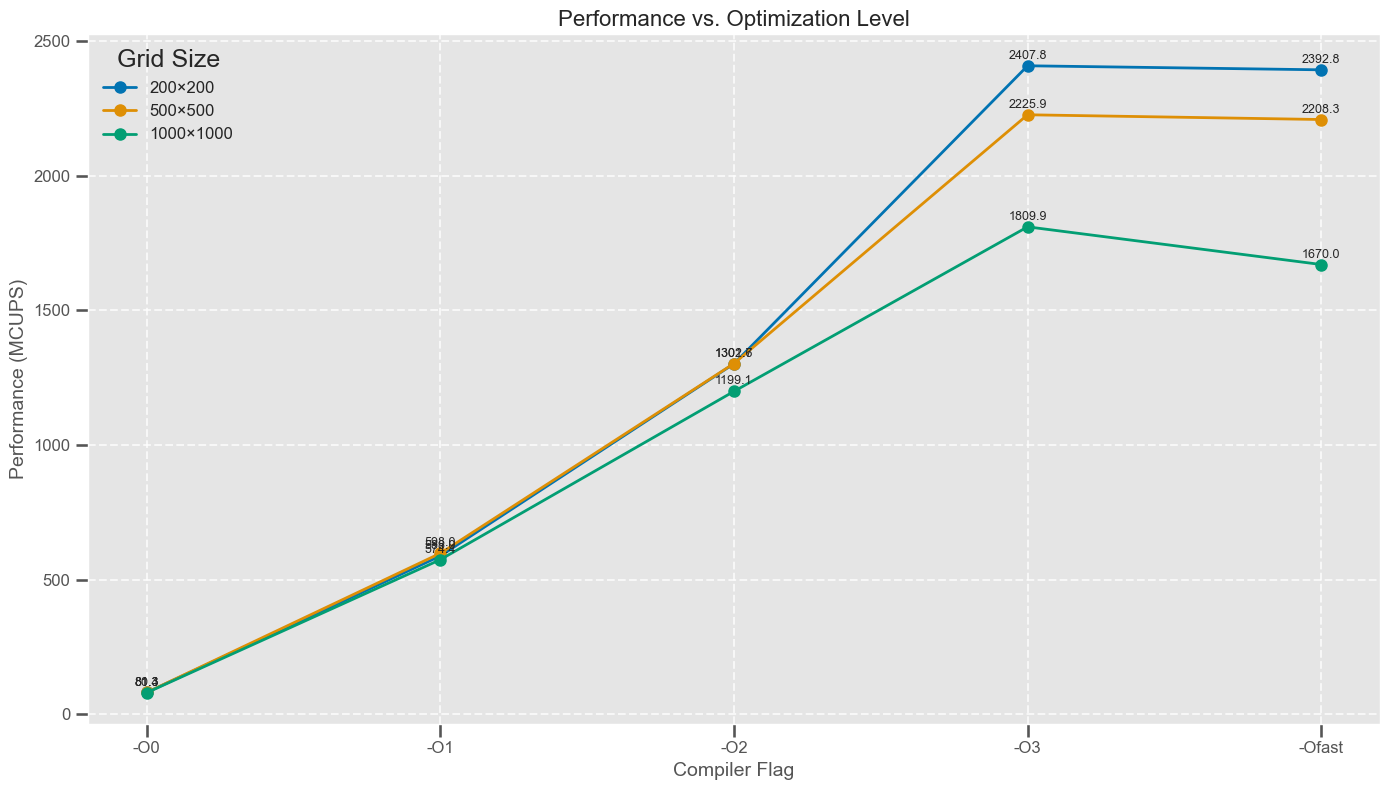

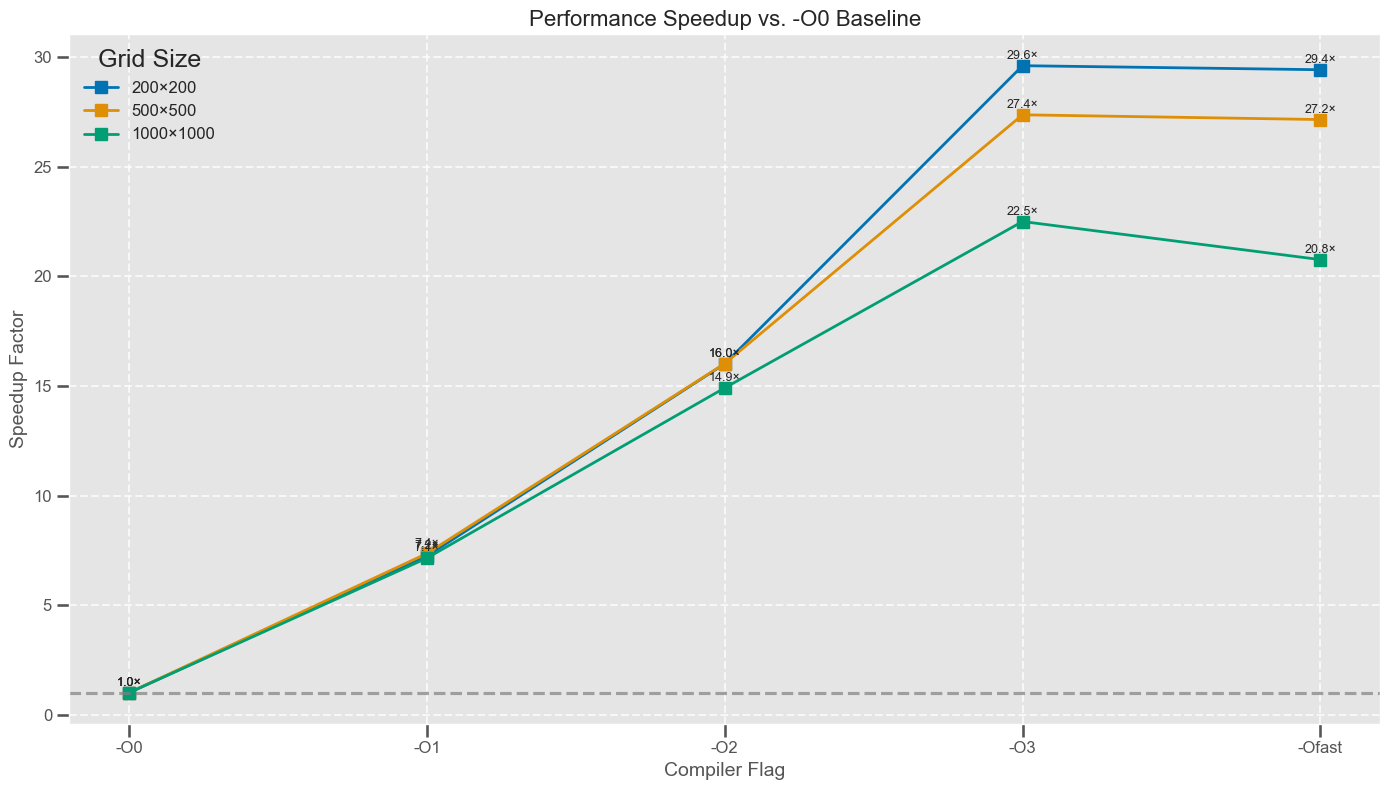

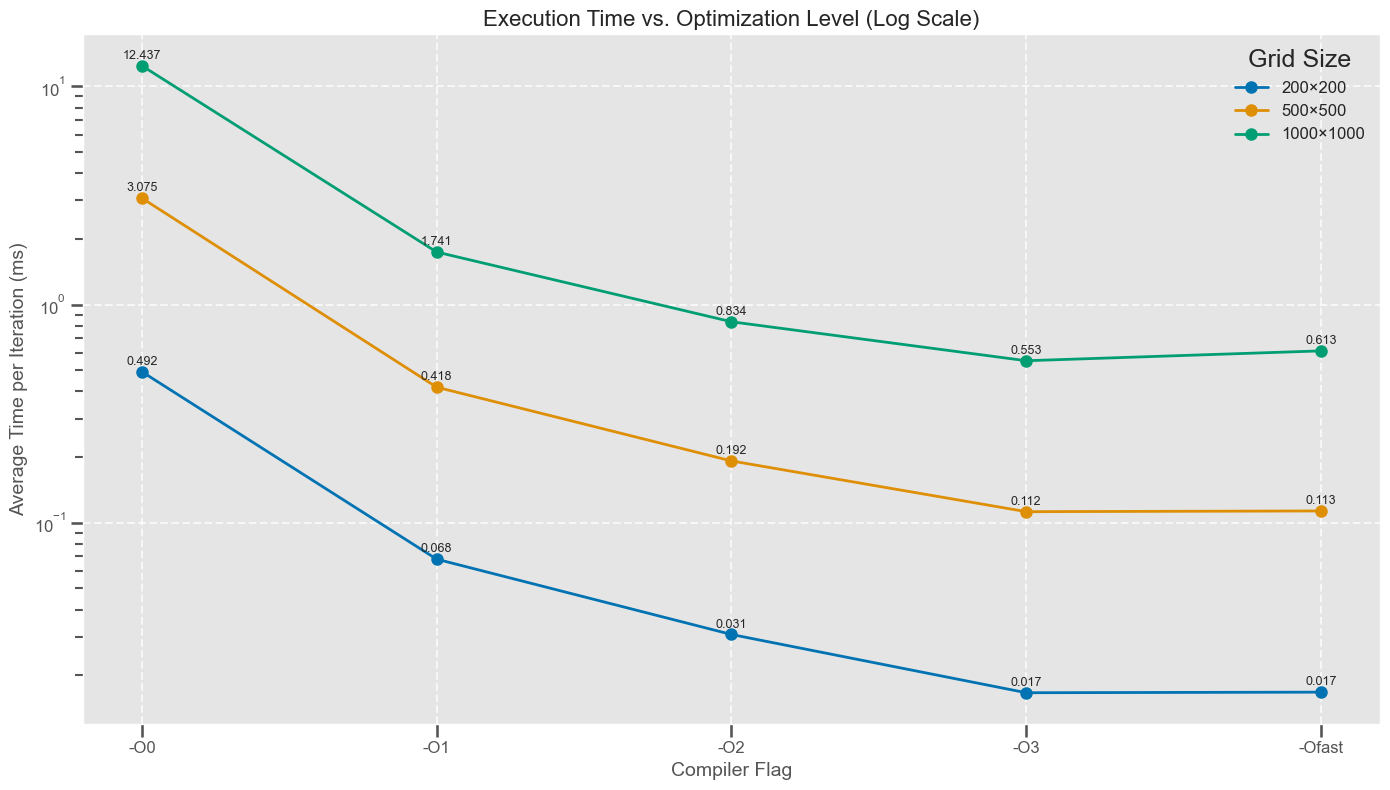

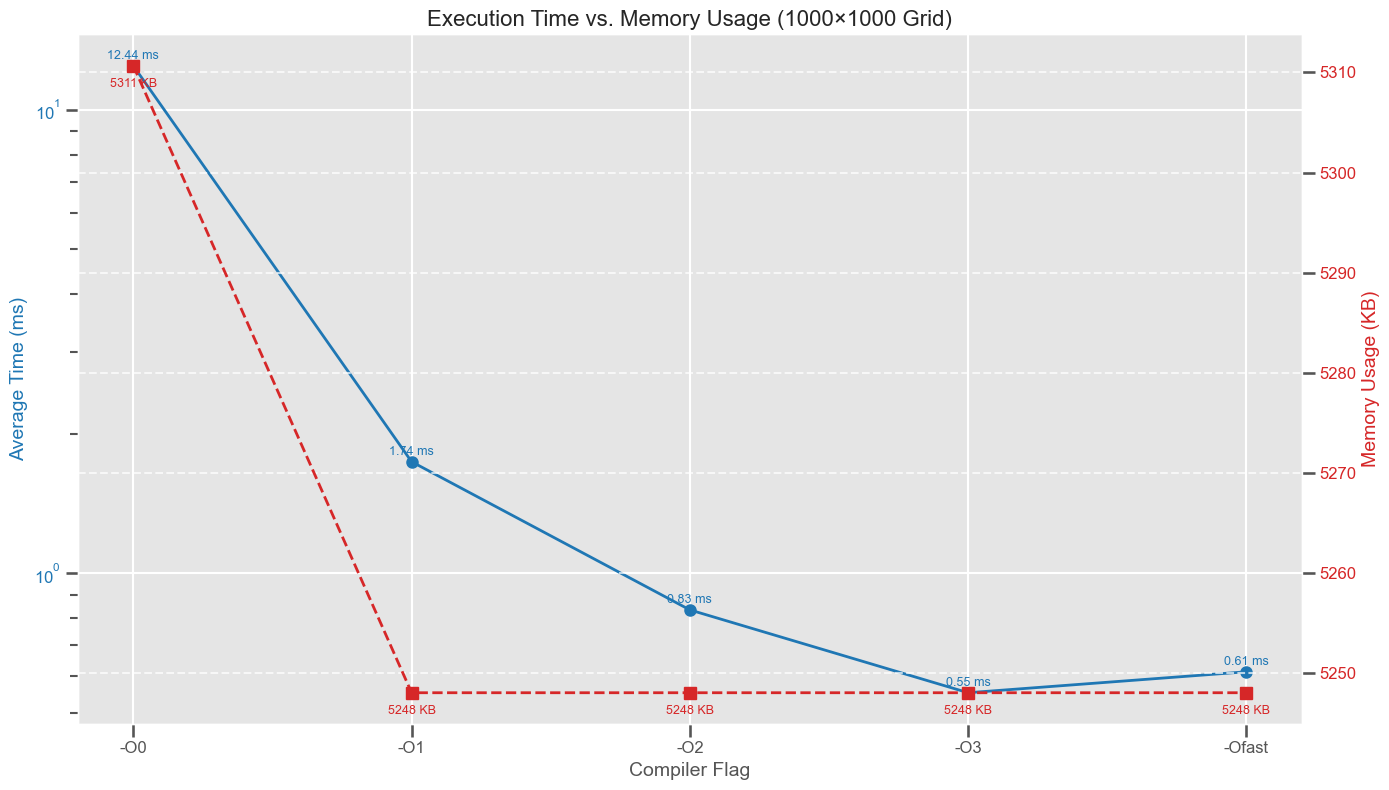

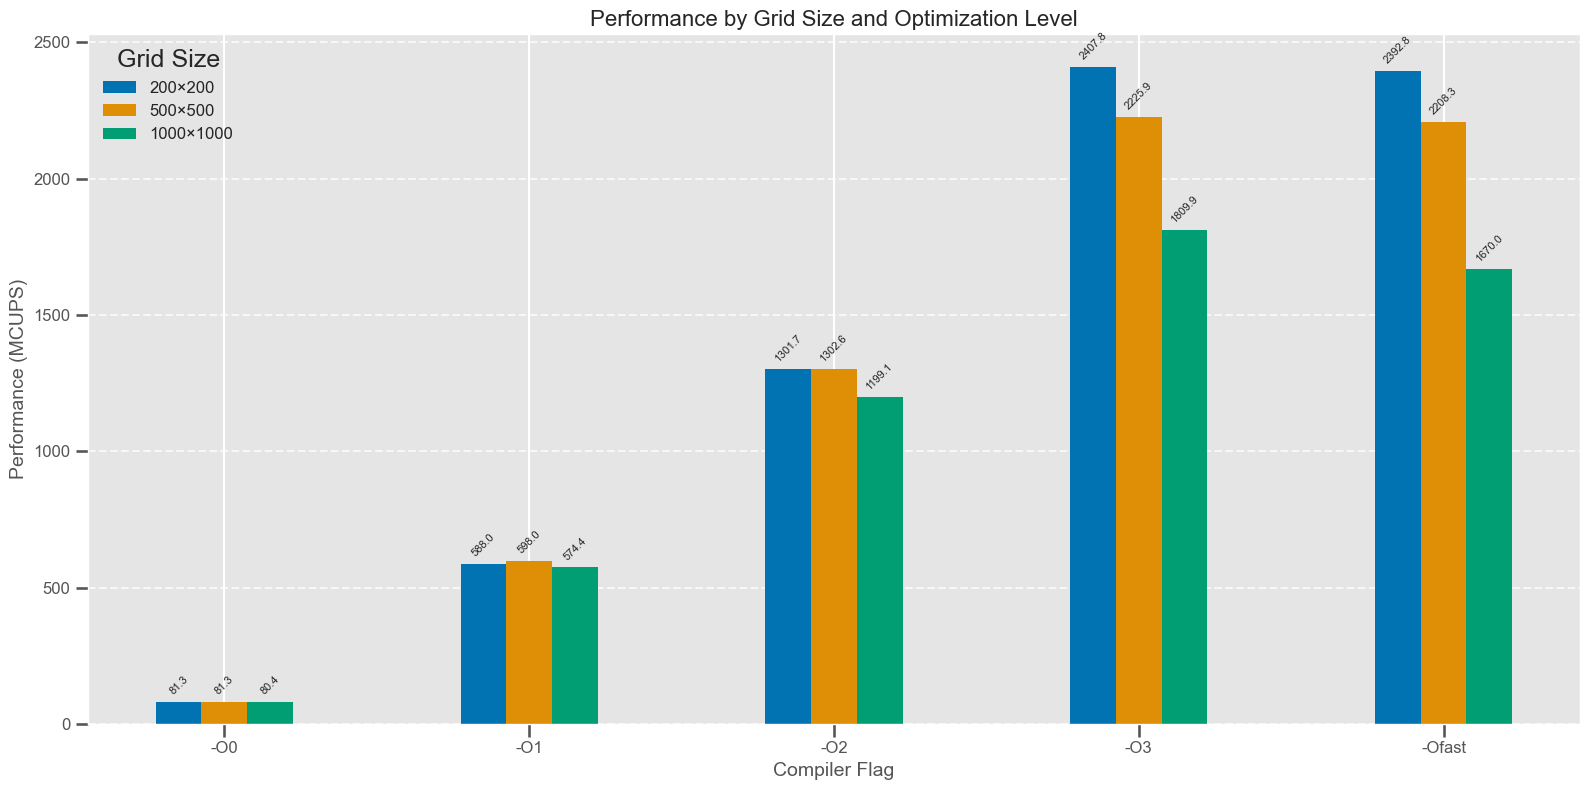

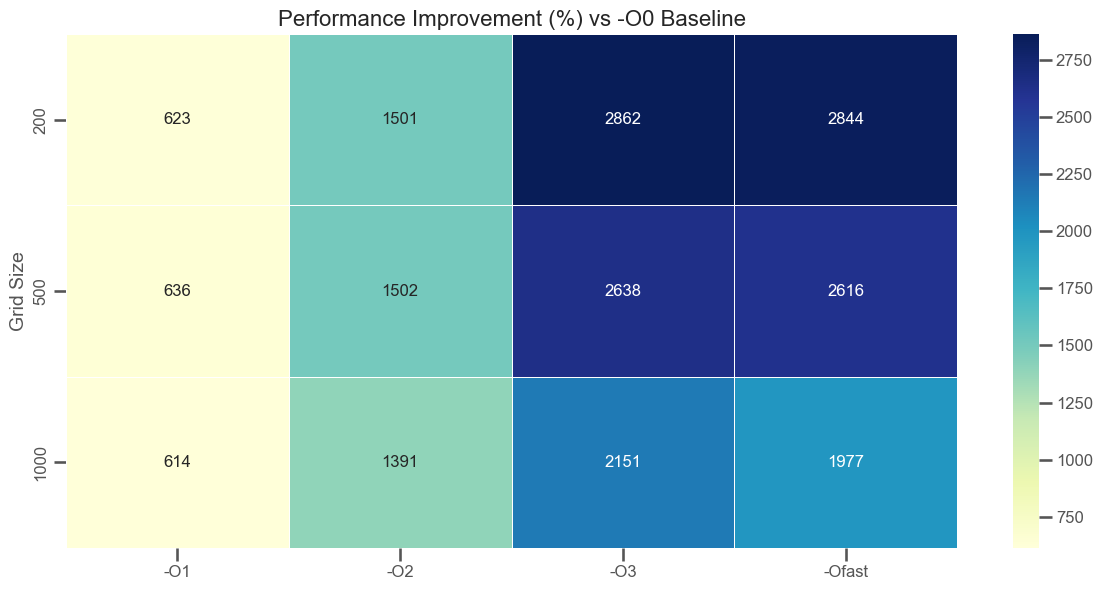

In [7]:
# 1. Performance comparison across optimization levels
plt.figure(figsize=(14, 8))

for size in sorted(df['Grid Size'].unique()):
    subset = df[df['Grid Size'] == size]
    plt.plot(subset['Flag'], subset['Performance (MCUPS)'], 
             marker='o', linewidth=2, markersize=8, label=f'{size}×{size}')

plt.title('Performance vs. Optimization Level', fontsize=16)
plt.xlabel('Compiler Flag', fontsize=14)
plt.ylabel('Performance (MCUPS)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Grid Size')

# Add annotations
for size in sorted(df['Grid Size'].unique()):
    subset = df[df['Grid Size'] == size]
    for i, row in subset.iterrows():
        plt.annotate(f"{row['Performance (MCUPS)']:.1f}", 
                    xy=(row['Flag'], row['Performance (MCUPS)']),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('compiler_flag_performance.png', dpi=300)
plt.show()

# 2. Speedup relative to -O0 baseline
plt.figure(figsize=(14, 8))

for size in sorted(df['Grid Size'].unique()):
    subset = df[df['Grid Size'] == size]
    baseline = subset[subset['Flag'] == '-O0']['Performance (MCUPS)'].values[0]
    
    # Calculate speedups
    speedups = subset['Performance (MCUPS)'] / baseline
    
    plt.plot(subset['Flag'], speedups, marker='s', linewidth=2, 
             markersize=8, label=f'{size}×{size}')
    
    # Add annotations
    for i, (flag, speedup) in enumerate(zip(subset['Flag'], speedups)):
        plt.annotate(f"{speedup:.1f}×", 
                   xy=(flag, speedup),
                   xytext=(0, 5),
                   textcoords="offset points",
                   ha='center', fontsize=9)

plt.title('Performance Speedup vs. -O0 Baseline', fontsize=16)
plt.xlabel('Compiler Flag', fontsize=14)
plt.ylabel('Speedup Factor', fontsize=14)
plt.axhline(y=1.0, color='gray', linestyle='--', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Grid Size')

plt.tight_layout()
plt.savefig('compiler_flag_speedup.png', dpi=300)
plt.show()

# 3. Time comparison across optimization levels (log scale)
plt.figure(figsize=(14, 8))

for size in sorted(df['Grid Size'].unique()):
    subset = df[df['Grid Size'] == size]
    plt.plot(subset['Flag'], subset['Average Time (ms)'], 
             marker='o', linewidth=2, markersize=8, label=f'{size}×{size}')

plt.title('Execution Time vs. Optimization Level (Log Scale)', fontsize=16)
plt.xlabel('Compiler Flag', fontsize=14)
plt.ylabel('Average Time per Iteration (ms)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')  # Use log scale for better visibility
plt.legend(title='Grid Size')

# Add annotations
for size in sorted(df['Grid Size'].unique()):
    subset = df[df['Grid Size'] == size]
    for i, row in subset.iterrows():
        plt.annotate(f"{row['Average Time (ms)']:.3f}", 
                    xy=(row['Flag'], row['Average Time (ms)']),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('compiler_flag_time_log.png', dpi=300)
plt.show()

# 4. Time vs Memory tradeoff (for 1000×1000 grid)
size_to_analyze = 1000
subset = df[df['Grid Size'] == size_to_analyze]

fig, ax1 = plt.subplots(figsize=(14, 8))

# Execution time on left y-axis
color = 'tab:blue'
ax1.set_xlabel('Compiler Flag', fontsize=14)
ax1.set_ylabel('Average Time (ms)', color=color, fontsize=14)
ax1.plot(subset['Flag'], subset['Average Time (ms)'], 'o-', color=color, linewidth=2, markersize=8)
ax1.set_yscale('log')  # Use log scale for execution time
for i, row in subset.iterrows():
    ax1.annotate(f"{row['Average Time (ms)']:.2f} ms", 
                xy=(row['Flag'], row['Average Time (ms)']),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', fontsize=9, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Memory usage on right y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Memory Usage (KB)', color=color, fontsize=14)
ax2.plot(subset['Flag'], subset['Memory Usage (KB)'], 's--', color=color, linewidth=2, markersize=8)
for i, row in subset.iterrows():
    ax2.annotate(f"{row['Memory Usage (KB)']:.0f} KB", 
                xy=(row['Flag'], row['Memory Usage (KB)']),
                xytext=(0, -15),
                textcoords="offset points",
                ha='center', fontsize=9, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'Execution Time vs. Memory Usage ({size_to_analyze}×{size_to_analyze} Grid)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('time_memory_tradeoff.png', dpi=300)
plt.show()

# 5. Comparative Bar Chart
plt.figure(figsize=(16, 8))

# Create a grouped bar plot
bar_width = 0.15
index = np.arange(len(df['Flag'].unique()))

for i, size in enumerate(sorted(df['Grid Size'].unique())):
    subset = df[df['Grid Size'] == size]
    plt.bar(index + i*bar_width, subset['Performance (MCUPS)'], 
            width=bar_width, label=f'{size}×{size}')

plt.xlabel('Compiler Flag', fontsize=14)
plt.ylabel('Performance (MCUPS)', fontsize=14)
plt.title('Performance by Grid Size and Optimization Level', fontsize=16)
plt.xticks(index + bar_width, df['Flag'].unique())
plt.legend(title='Grid Size')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, size in enumerate(sorted(df['Grid Size'].unique())):
    subset = df[df['Grid Size'] == size]
    for j, value in enumerate(subset['Performance (MCUPS)']):
        plt.text(j + i*bar_width, value + 20, f"{value:.1f}", 
                 ha='center', va='bottom', fontsize=8, rotation=45)

plt.tight_layout()
plt.savefig('optimization_comparison_bar.png', dpi=300)
plt.show()

# 6. Heatmap of optimization gain
# Create a pivot table for the heatmap
heatmap_data = pd.pivot_table(df, 
                             index='Grid Size', 
                             columns='Flag', 
                             values='Performance (MCUPS)')

# Calculate percentage improvement over -O0
for col in heatmap_data.columns:
    if col != '-O0':
        heatmap_data[f'{col} gain'] = (heatmap_data[col] - heatmap_data['-O0']) / heatmap_data['-O0'] * 100

# Extract only the gain columns for the heatmap
gain_columns = [col for col in heatmap_data.columns if 'gain' in col]
gain_data = heatmap_data[gain_columns]
# Rename columns for cleaner display
gain_data.columns = [col.split(' ')[0] for col in gain_columns]

plt.figure(figsize=(12, 6))
sns.heatmap(gain_data, annot=True, fmt='.0f', cmap='YlGnBu', 
            linewidths=0.5, annot_kws={"size": 12})
plt.title('Performance Improvement (%) vs -O0 Baseline', fontsize=16)
plt.ylabel('Grid Size', fontsize=14)
plt.tight_layout()
plt.savefig('optimization_gain_heatmap.png', dpi=300)
plt.show()


In [8]:
# Set style for better-looking charts
plt.style.use('ggplot')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 8)

In [9]:
#v3_size optimization
# here we choose 64*64 
#not sure why the block finder is not working properly


In [71]:
# Define grid sizes for all benchmarks
grid_sizes = [100, 200, 500, 1000, 2000]

#iteration=1000
#nRuns=10

# Sample data from benchmarks - replace with your actual measurements
# Format: [setup_time, avg_iter_time, min_iter_time, max_iter_time, total_time]
baseline_data = {
    100: [0.0157959 , 0.00413903, 0.0038039,0.0291207, 4.13903],
    200: [0.0647583, 0.0172309, 0.0158084, 0.063679, 17.2309],
    500: [0.344296, 0.0976958, 0.0890957, 0.376212,  97.6958],
    1000: [1.5697, 0.439495, 0.386033, 2.47662, 439.495],
    2000: [6.60329, 2.44691, 2.14705, 9.96488, 2446.91]
}

optimized_v1_data = {
    100: [0.0242084, 0.0052165, 0.0046289, 0.0402669, 5.2165],
    200: [0.0392083, 0.0153531, 0.0136705, 0.0671081, 15.3531],
    500: [0.369879, 0.087371,0.0840456, 0.203104, 87.371 ],
    1000: [1.32165, 0.39334, 0.371479, 0.889954, 393.34],
    2000: [5.84044,1.89248, 1.71461, 10.7855, 1892.48]
}

optimized_v2_data = {
    100: [0.0111833, 0.00437761,0.0040247,0.0286503, 4.37761],
    200: [0.05135, 0.0150205, 0.0139749, 0.0711208, 15.0205],
    500: [0.341037, 0.0880404, 0.0840539, 0.234804, 88.0404],
    1000: [1.23857, 0.399554, 0.372379, 0.988375, 399.554],
    2000: [6.35119, 1.95375, 1.71712, 10.7945, 1953.75]
}

optimized_v3_data = {
    100: [0.0158459, 0.00580263, 0.0052455, 0.0274124, 5.80263],
    200: [0.0524626,0.0211902, 0.0194541, 0.077100, 21.1902],
    500: [0.320146, 0.128837, 0.119142, 0.408063, 128.837],
    1000: [1.42408, 0.701702, 0.617392, 1.67213, 701.702],
    2000: [6.26005, 4.95803, 4.1602, 26.0489, 4958.03]
}

In [72]:
# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'Grid Size': grid_sizes * 4,
    'Implementation': ['Baseline'] * 5 + ['Optimized v1'] * 5 + ['Optimized v2'] * 5 + ['Optimized v3'] * 5,
    'Setup Time (μs)': [baseline_data[s][0] *1000 for s in grid_sizes] + 
                      [optimized_v1_data[s][0] *1000 for s in grid_sizes] + 
                      [optimized_v2_data[s][0]*1000  for s in grid_sizes] + 
                      [optimized_v3_data[s][0]*1000  for s in grid_sizes],
    'Avg Iter Time (μs)': [baseline_data[s][1]*1000 for s in grid_sizes] + 
                         [optimized_v1_data[s][1]*1000 for s in grid_sizes] + 
                         [optimized_v2_data[s][1]*1000 for s in grid_sizes] + 
                         [optimized_v3_data[s][1]*1000 for s in grid_sizes],
    'Min Iter Time (μs)': [baseline_data[s][2]*1000 for s in grid_sizes] + 
                         [optimized_v1_data[s][2]*1000 for s in grid_sizes] + 
                         [optimized_v2_data[s][2]*1000 for s in grid_sizes] + 
                         [optimized_v3_data[s][2]*1000 for s in grid_sizes],
    'Max Iter Time (μs)': [baseline_data[s][3]*1000 for s in grid_sizes] + 
                         [optimized_v1_data[s][3]*1000 for s in grid_sizes] + 
                         [optimized_v2_data[s][3]*1000 for s in grid_sizes] + 
                         [optimized_v3_data[s][3]*1000 for s in grid_sizes],
    'Total Time (ms)': [baseline_data[s][4] for s in grid_sizes] + 
                      [optimized_v1_data[s][4] for s in grid_sizes] + 
                      [optimized_v2_data[s][4] for s in grid_sizes] + 
                      [optimized_v3_data[s][4] for s in grid_sizes]
})


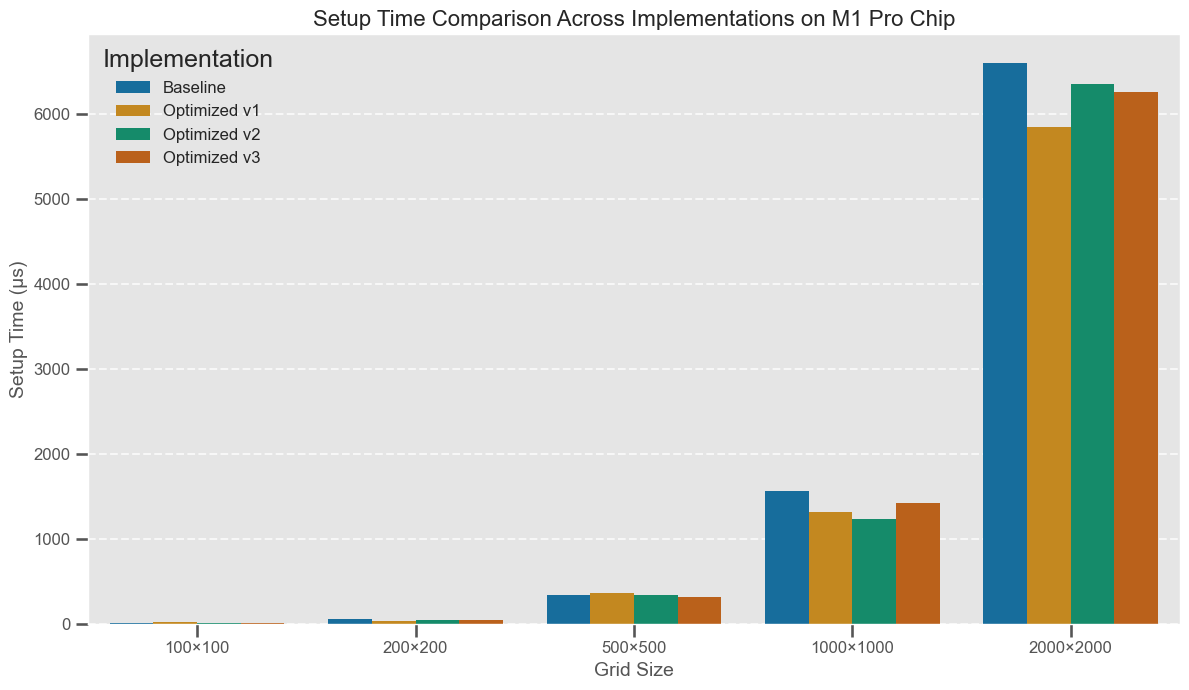

In [12]:
# 1. Setup Time Comparison
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Grid Size', y='Setup Time (μs)', hue='Implementation')
plt.title('Setup Time Comparison Across Implementations on M1 Pro Chip', fontsize=16)
plt.xlabel('Grid Size', fontsize=14)
plt.ylabel('Setup Time (μs)', fontsize=14)
plt.xticks(ticks=range(5), labels=[f'{s}×{s}' for s in grid_sizes])
plt.legend(title='Implementation', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('setup_time_comparison.png', dpi=300)
plt.tight_layout()
plt.show()

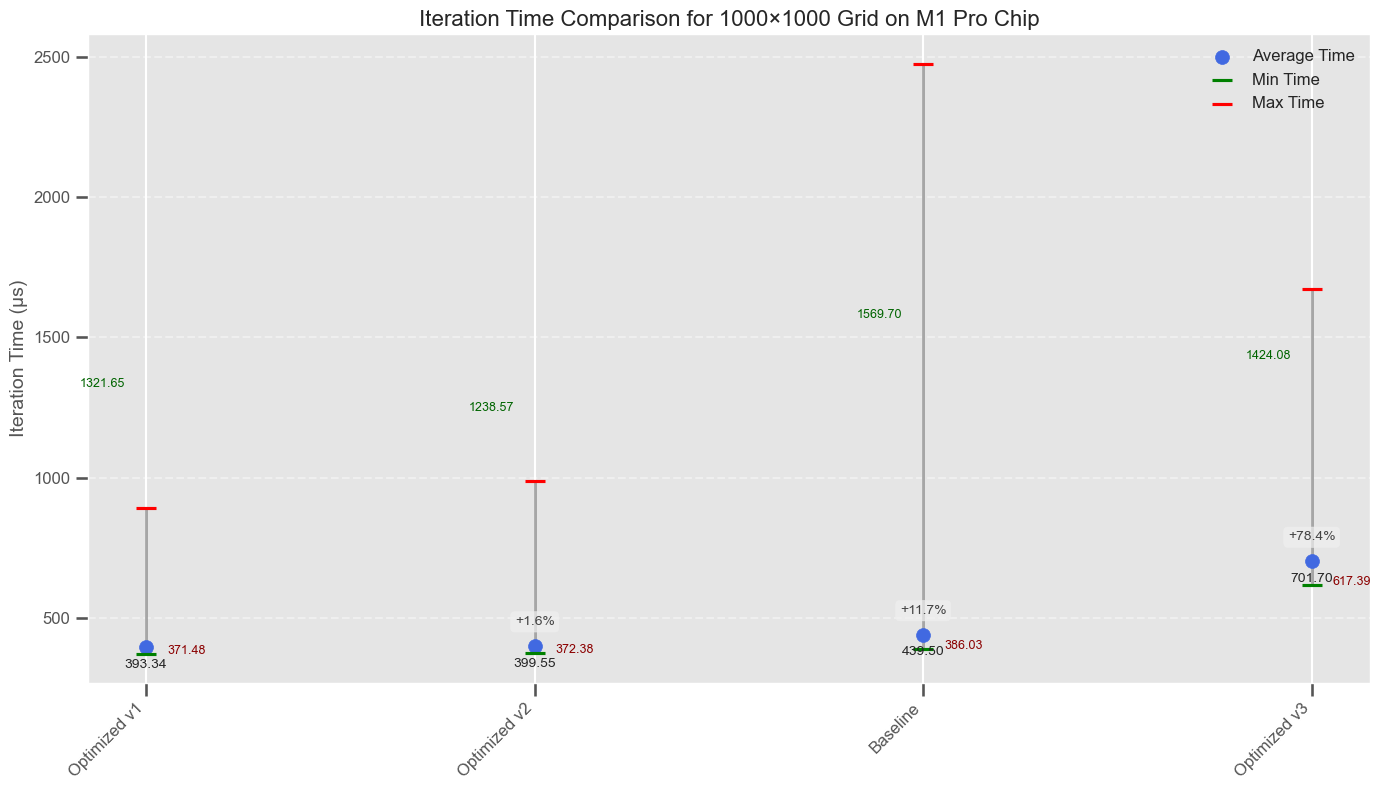

In [75]:
# Improved Iteration Time Visualization: Lollipop Chart with Range
plt.figure(figsize=(14, 8))
# Filter for 1000x1000 grid size
df_1000 = df[df['Grid Size'] == 1000].copy()

# Sort implementations by average iteration time for better visualization
df_1000_sorted = df_1000.sort_values('Avg Iter Time (μs)')

# Create the lollipop chart
plt.vlines(x=range(len(df_1000_sorted)), 
           ymin=df_1000_sorted['Min Iter Time (μs)'], 
           ymax=df_1000_sorted['Max Iter Time (μs)'], 
           color='grey', alpha=0.7, linewidth=2)

plt.scatter(range(len(df_1000_sorted)), df_1000_sorted['Avg Iter Time (μs)'],
            color='royalblue', s=100, zorder=3, label='Average Time')
plt.scatter(range(len(df_1000_sorted)), df_1000_sorted['Min Iter Time (μs)'],
            color='green', marker='_', s=200, zorder=3, label='Min Time')
plt.scatter(range(len(df_1000_sorted)), df_1000_sorted['Max Iter Time (μs)'],
            color='red', marker='_', s=200, zorder=3, label='Max Time')

# Add annotations
for i, row in enumerate(df_1000_sorted.itertuples()):
    # Annotate average time
    plt.annotate(f'{row._4:.2f}', # Avg time
                xy=(i, row._4),
                xytext=(0, -15),
                textcoords='offset points',
                ha='center', fontsize=10)
    
    # Annotate min time
    plt.annotate(f'{row._3:.2f}', # Min time 
                xy=(i, row._3),
                xytext=(-15, 0),
                textcoords='offset points',
                ha='right', fontsize=9, color='darkgreen')
    
    # Annotate max time
    plt.annotate(f'{row._5:.2f}', # Max time
                xy=(i, row._5),
                xytext=(15, 0),
                textcoords='offset points',
                ha='left', fontsize=9, color='darkred')

plt.xticks(range(len(df_1000_sorted)), df_1000_sorted['Implementation'], rotation=45, ha='right')
plt.ylabel('Iteration Time (μs)', fontsize=14)
plt.title('Iteration Time Comparison for 1000×1000 Grid on M1 Pro Chip', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()

# Add percent difference from best implementation
min_avg_time = df_1000_sorted['Avg Iter Time (μs)'].min()
for i, row in enumerate(df_1000_sorted.itertuples()):
    if i > 0:  # Skip the best implementation
        pct_diff = ((row._4 - min_avg_time) / min_avg_time) * 100
        plt.annotate(f'+{pct_diff:.1f}%',
                   xy=(i, row._4),
                   xytext=(0, 15),
                   textcoords='offset points',
                   ha='center', fontsize=10, color='#444444',
                   bbox=dict(boxstyle='round,pad=0.3', fc='#F0F0F0', alpha=0.7))

plt.tight_layout()
plt.savefig('iteration_time_lollipop_analysis.png', dpi=300)
plt.show()

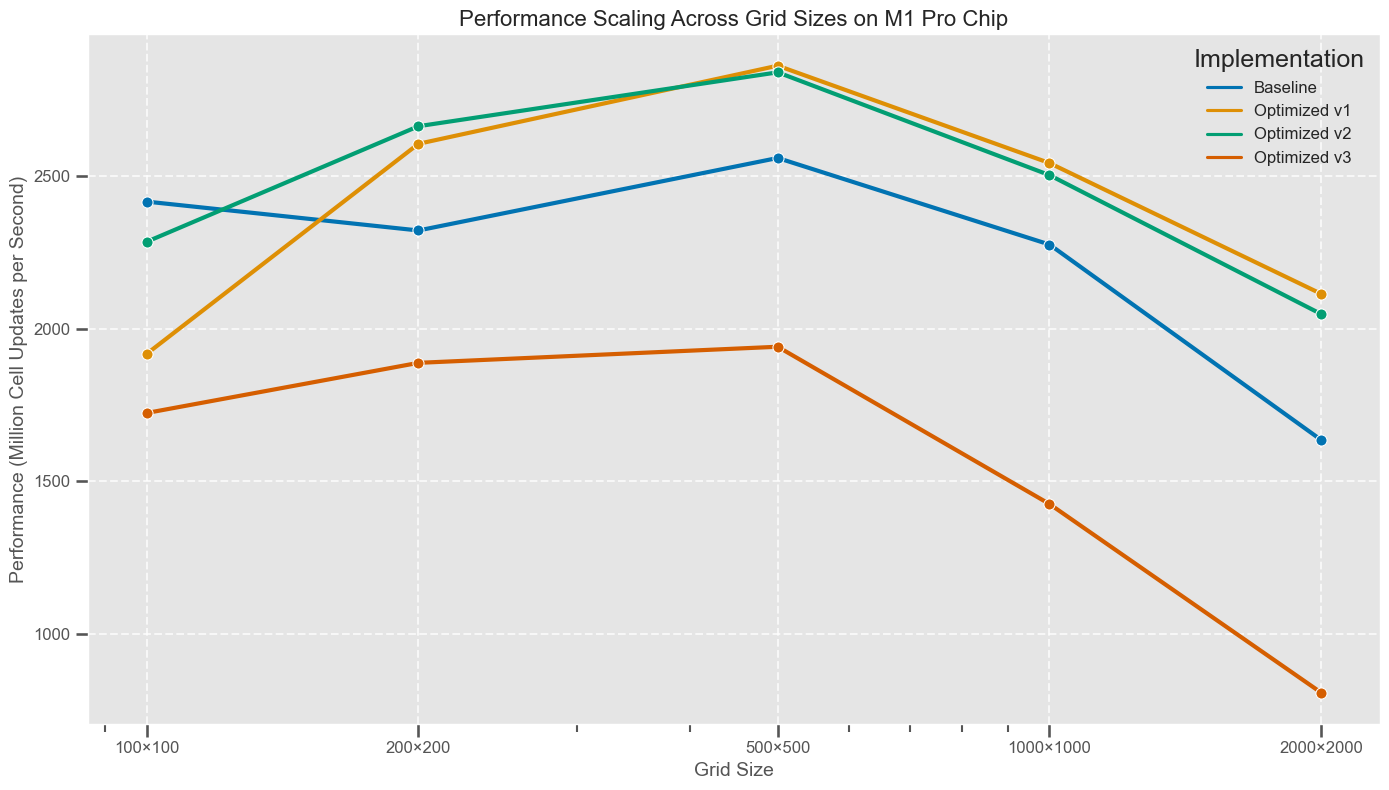

In [14]:
# 3. Performance scaling across grid sizes
plt.figure(figsize=(14, 8))

# Calculate performance in cell updates per second
for idx, row in df.iterrows():
    grid_size = row['Grid Size']
    df.loc[idx, 'Performance (MCUPS)'] = (grid_size * grid_size * 1000) / (row['Avg Iter Time (μs)']/1000 * 1e6)

sns.lineplot(data=df, x='Grid Size', y='Performance (MCUPS)', hue='Implementation', 
             marker='o', markersize=8, linewidth=3)

plt.title('Performance Scaling Across Grid Sizes on M1 Pro Chip', fontsize=16)
plt.xlabel('Grid Size', fontsize=14)
plt.ylabel('Performance (Million Cell Updates per Second)', fontsize=14)
plt.xscale('log')
plt.xticks(grid_sizes, [f'{s}×{s}' for s in grid_sizes])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Implementation', fontsize=12)
plt.tight_layout()
plt.savefig('performance_scaling.png', dpi=300)
plt.show()

<Figure size 1400x1000 with 0 Axes>

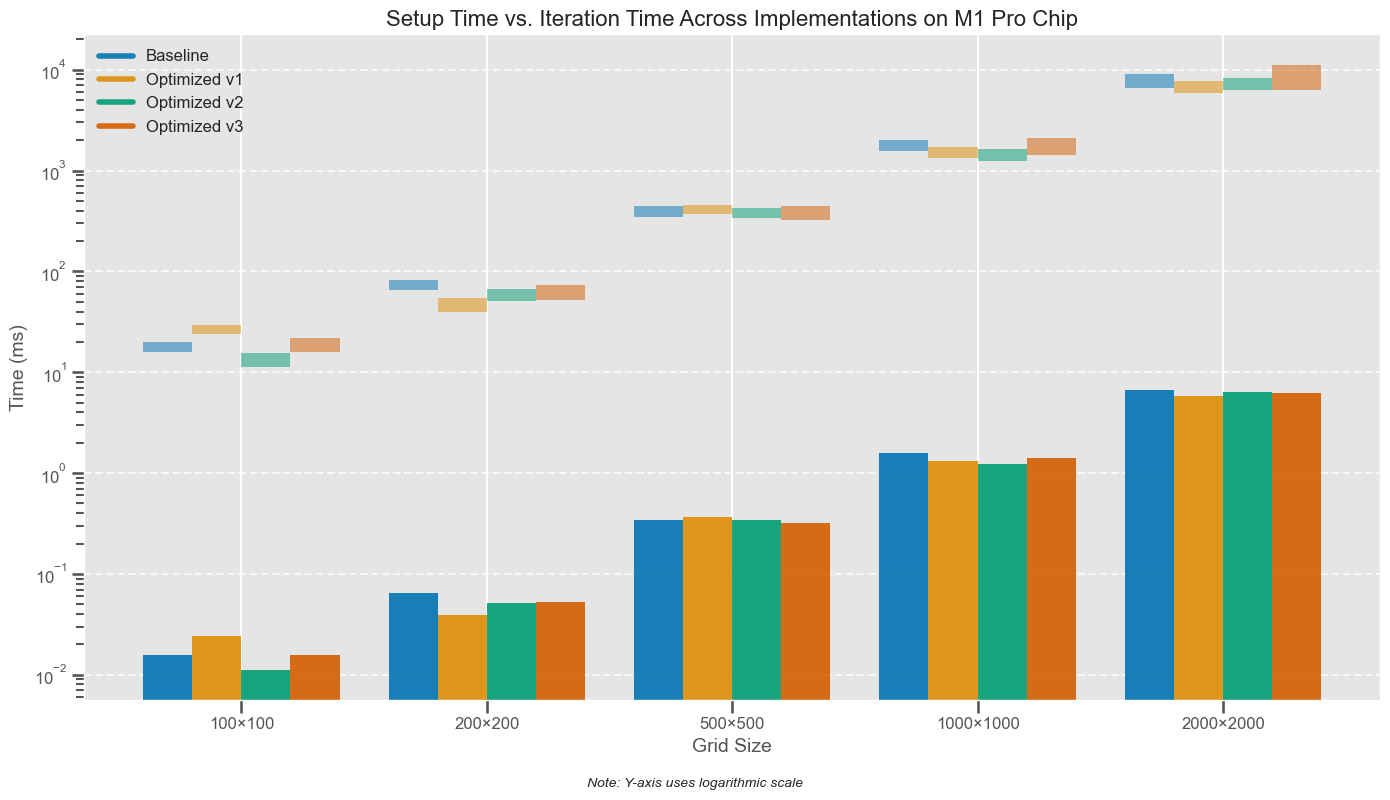

In [15]:
# 4. Combined visualization of setup and iteration time
plt.figure(figsize=(14, 10))

# Prepare data for stacked chart
setup_data = df.pivot(index='Grid Size', columns='Implementation', values='Setup Time (μs)')
iter_data = df.pivot(index='Grid Size', columns='Implementation', values='Total Time (ms)')

# Convert to numpy arrays for easier manipulation
setup_vals = setup_data.to_numpy()
iter_vals = iter_data.to_numpy()

# Grid size labels
grid_labels = [f'{s}×{s}' for s in grid_sizes]

# Bar positions
bar_width = 0.2
r1 = np.arange(len(grid_sizes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create stacked bars
fig, ax = plt.subplots(figsize=(14, 8))

# Baseline
p1 = ax.bar(r1, setup_data['Baseline']/1000, bar_width, label='Baseline Setup', color='#0173b2', alpha=0.9)
p2 = ax.bar(r1, iter_data['Baseline'], bar_width, bottom=setup_data['Baseline'], 
            label='Baseline Iteration', color='#0173b2', alpha=0.5)

# Optimized v1
p3 = ax.bar(r2, setup_data['Optimized v1']/1000, bar_width, label='Optimized v1 Setup', color='#de8f05', alpha=0.9)
p4 = ax.bar(r2, iter_data['Optimized v1'], bar_width, bottom=setup_data['Optimized v1'], 
            label='Optimized v1 Iteration', color='#de8f05', alpha=0.5)

# Optimized v2
p5 = ax.bar(r3, setup_data['Optimized v2']/1000, bar_width, label='Optimized v2 Setup', color='#029e73', alpha=0.9)
p6 = ax.bar(r3, iter_data['Optimized v2'], bar_width, bottom=setup_data['Optimized v2'], 
            label='Optimized v2 Iteration', color='#029e73', alpha=0.5)

# Optimized v3
p7 = ax.bar(r4, setup_data['Optimized v3']/1000, bar_width, label='Optimized v3 Setup', color='#d55e00', alpha=0.9)
p8 = ax.bar(r4, iter_data['Optimized v3'], bar_width, bottom=setup_data['Optimized v3'], 
            label='Optimized v3 Iteration', color='#d55e00', alpha=0.5)

# Add labels and title
ax.set_xlabel('Grid Size', fontsize=14)
ax.set_ylabel('Time (ms)', fontsize=14)
ax.set_title('Setup Time vs. Iteration Time Across Implementations on M1 Pro Chip', fontsize=16)
ax.set_xticks([r + bar_width*1.5 for r in range(len(grid_sizes))])
ax.set_xticklabels(grid_labels)

# Add legend with grouped items
handles = [
    (p1[0], p2[0]), 
    (p3[0], p4[0]),
    (p5[0], p6[0]),
    (p7[0], p8[0])
]
labels = ['Baseline', 'Optimized v1', 'Optimized v2', 'Optimized v3']

# Use logarithmic scale for large values
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create custom legend
legend_elements = []
for i, impl in enumerate(['Baseline', 'Optimized v1', 'Optimized v2', 'Optimized v3']):
    color = [p1[0], p3[0], p5[0], p7[0]][i].get_facecolor()
    legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=impl))

ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

# Add note about logarithmic scale
plt.figtext(0.5, 0.01, "Note: Y-axis uses logarithmic scale", ha="center", fontsize=10, style='italic')
plt.savefig('setup_iteration_comparison.png', dpi=300)
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()


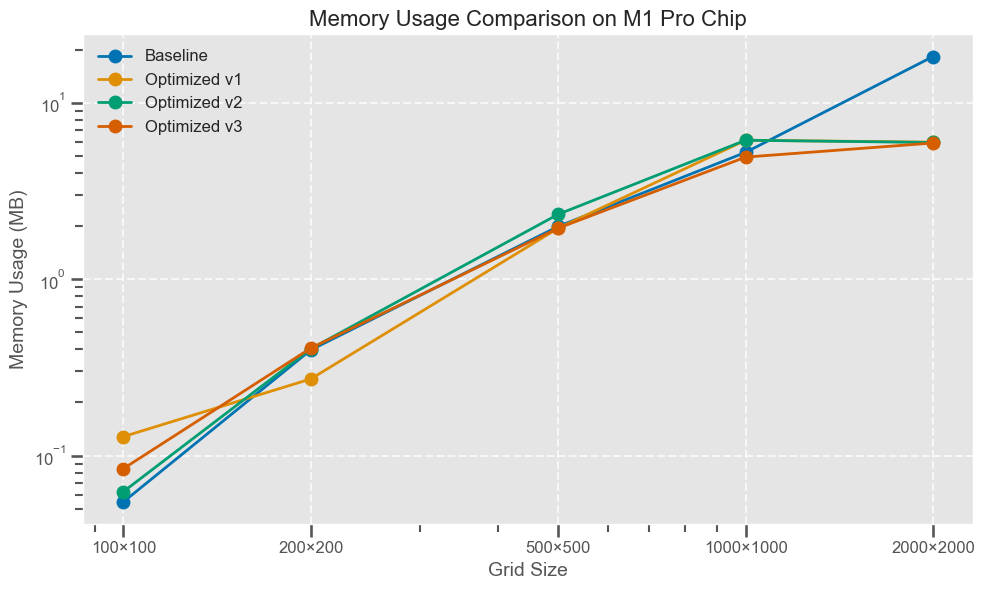

In [16]:
# Memory usage visualization
# Replace with your actual memory measurements in kB
memory_usage = {
    'Baseline': [56, 406.4, 2040, 5360, 18708.8],
    'Optimized v1': [131.2, 278.4, 1993.6 , 6278.4, 6124.8],
    'Optimized v2': [64,  412.8 , 2390.4,  6281.6, 6097.6], 
    'Optimized v3': [86.4, 416, 1993.6, 5038.4 , 6054.4]  
}

# Convert to MB for readability
for impl in memory_usage:
    memory_usage[impl] = [m/1024 for m in memory_usage[impl]]

fig, ax = plt.subplots(figsize=(10, 6))

for impl, mem in memory_usage.items():
    ax.plot(grid_sizes, mem, 'o-', linewidth=2, label=impl)

ax.set_xlabel('Grid Size', fontsize=14)
ax.set_ylabel('Memory Usage (MB)', fontsize=14)
ax.set_title('Memory Usage Comparison on M1 Pro Chip', fontsize=16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(grid_sizes)
ax.set_xticklabels([f'{size}×{size}' for size in grid_sizes])
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('memory_usage_comparison.png', dpi=300)
plt.show()

## Parallelism


In [17]:
## Note that openmp thread number will not change on my m1 Pro chip

In [18]:
# Function to convert cell updates per second to Million Cell Updates Per Second (MCUPS)
def to_mcups(cells_per_second):
    return cells_per_second / 1e6  # Convert to millions

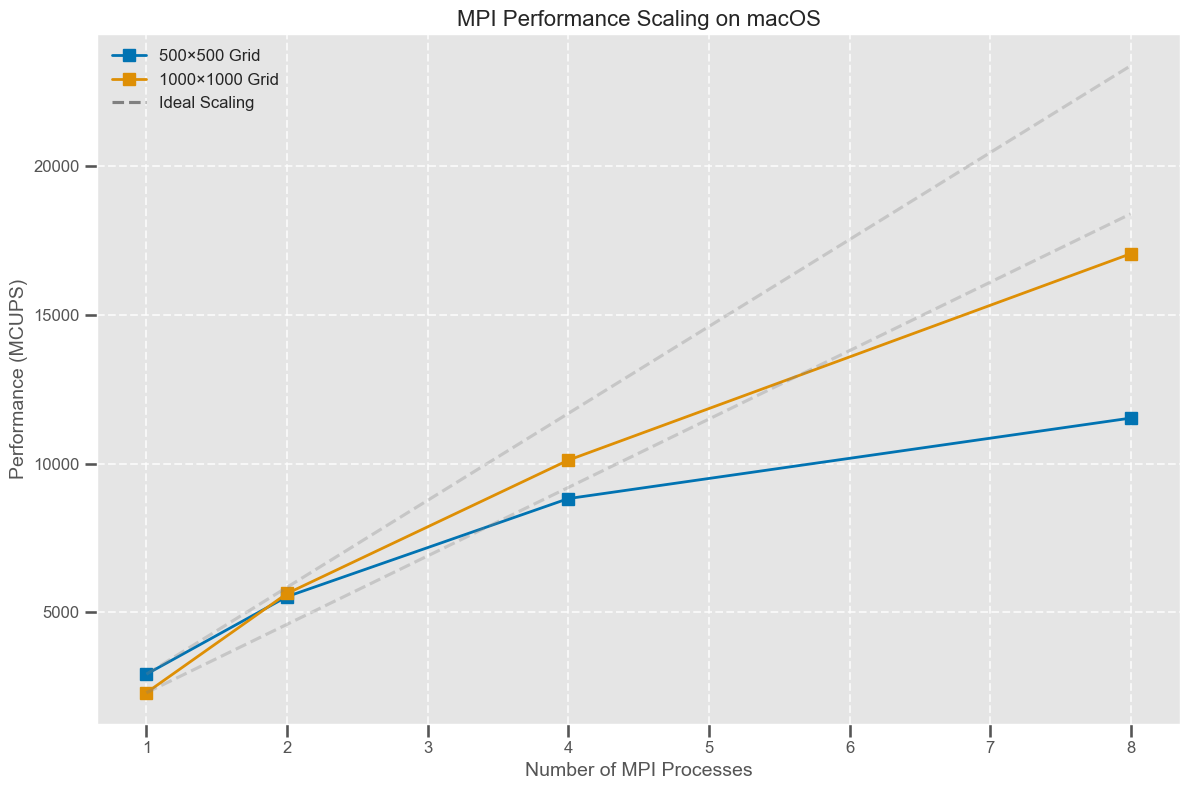

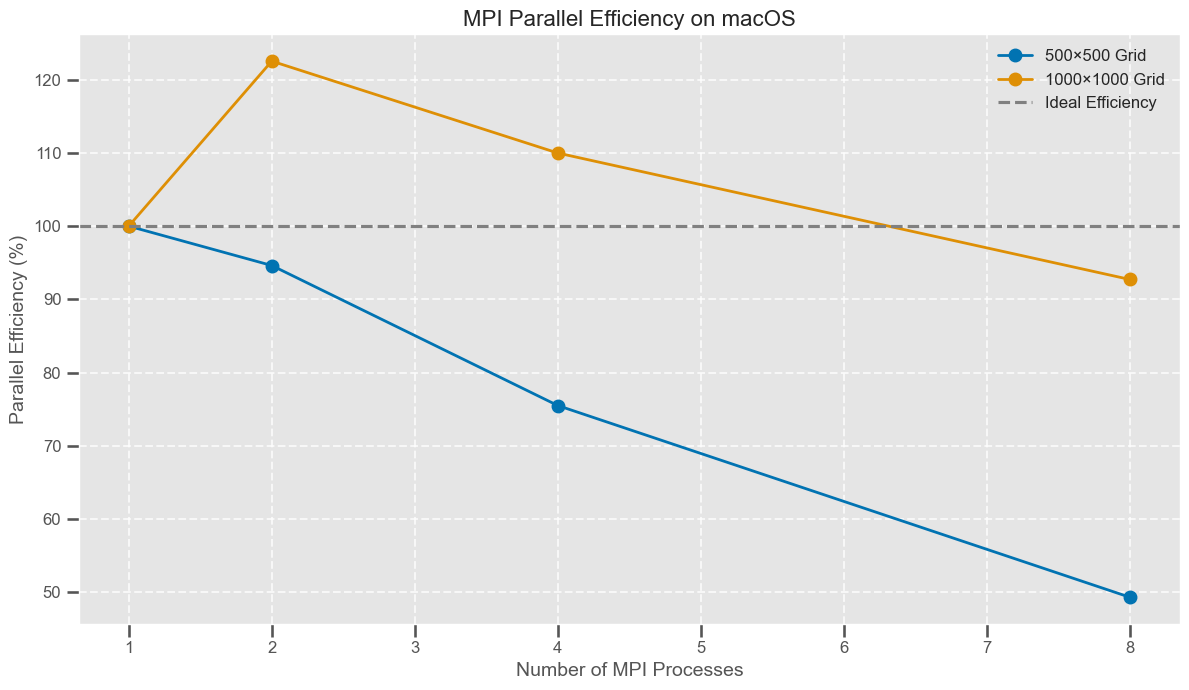

In [19]:
# Number of processes
mpi_processes = [1, 2, 4, 8]

## nruns=5 
## iteration=1000

# Performance data for MPI (MCUPS)
mpi_raw_perf = {
    500: [2.92131e+09,  5.52851e+09, 8.823e+09, 1.15285e+10 ],
    1000: [2.29899e+9, 5.6337e+09, 1.01137e+10, 1.7052e+10]
}

mpi_perf = {}
for size, perf_list in mpi_raw_perf.items():
    mpi_perf[size] = [to_mcups(perf) for perf in perf_list]

# Plot performance lines
for size in mpi_perf:
    plt.plot(mpi_processes, mpi_perf[size], 's-', linewidth=2, 
             label=f'{size}×{size} Grid')

# Add speedup reference line based on first process performance
for size in mpi_perf:
    ideal = [mpi_perf[size][0] * p for p in mpi_processes]
    plt.plot(mpi_processes, ideal, '--', color='gray', alpha=0.3)

# Add a single ideal scaling line for legend
ideal_ref = [mpi_perf[list(mpi_perf.keys())[0]][0] * p for p in mpi_processes]
plt.plot([], [], '--', color='gray', label='Ideal Scaling')

plt.title('MPI Performance Scaling on macOS', fontsize=16)
plt.xlabel('Number of MPI Processes', fontsize=14)
plt.ylabel('Performance (MCUPS)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('mpi_performance_mac.png', dpi=300)
plt.show()

# Calculate and display efficiency
plt.figure(figsize=(12, 7))
for size in mpi_perf:
    efficiency = [mpi_perf[size][i] / (mpi_perf[size][0] * mpi_processes[i]) * 100 
                  for i in range(len(mpi_processes))]
    plt.plot(mpi_processes, efficiency, 'o-', linewidth=2, 
             label=f'{size}×{size} Grid')

plt.axhline(y=100, color='gray', linestyle='--', label='Ideal Efficiency')
plt.title('MPI Parallel Efficiency on macOS', fontsize=16)
plt.xlabel('Number of MPI Processes', fontsize=14)
plt.ylabel('Parallel Efficiency (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('mpi_efficiency_mac.png', dpi=300)
plt.show()

In [20]:
# Define grid sizes for all benchmarks
grid_sizes = [100, 200, 500, 1000, 2000]

# Convert raw time to MCUPS (Million Cell Updates Per Second)
def time_to_mcups(grid_size, time_ms):
    cells = grid_size * grid_size
    updates_per_second = (cells * 1000) / time_ms
    return updates_per_second / 1e9

# Calculate MCUPS for each implementation and grid size
implementations = ['Baseline', 'Optimized v1', 'Optimized v2', 'Optimized v3']
performance_data = []

for size in grid_sizes:
    # Calculate MCUPS using average iteration time (in ms)
    baseline_mcups = time_to_mcups(size, baseline_data[size][1])
    opt_v1_mcups = time_to_mcups(size, optimized_v1_data[size][1])
    opt_v2_mcups = time_to_mcups(size, optimized_v2_data[size][1])
    opt_v3_mcups = time_to_mcups(size, optimized_v3_data[size][1])
    
    performance_data.append([size, 'Baseline', baseline_mcups])
    performance_data.append([size, 'Optimized v1', opt_v1_mcups])
    performance_data.append([size, 'Optimized v2', opt_v2_mcups])
    performance_data.append([size, 'Optimized v3', opt_v3_mcups])

# Create DataFrame for serial implementations
df_serial = pd.DataFrame(performance_data, columns=['Grid Size', 'Implementation', 'Performance (MCUPS)'])

# Create DataFrame for MPI implementation
mpi_processes = [1, 2, 4, 8]
mpi_perf = {
    500: [2.92, 5.53, 8.82, 11.53],  # MCUPS values, rounded from raw data
    1000: [2.30, 5.63, 10.11, 17.05]
}

mpi_data = []
for size in [500, 1000]:
    for i, procs in enumerate(mpi_processes):
        mpi_data.append([size, procs, mpi_perf[size][i]])
        
df_mpi = pd.DataFrame(mpi_data, columns=['Grid Size', 'MPI Processes', 'Performance (MCUPS)'])



<Figure size 1400x800 with 0 Axes>

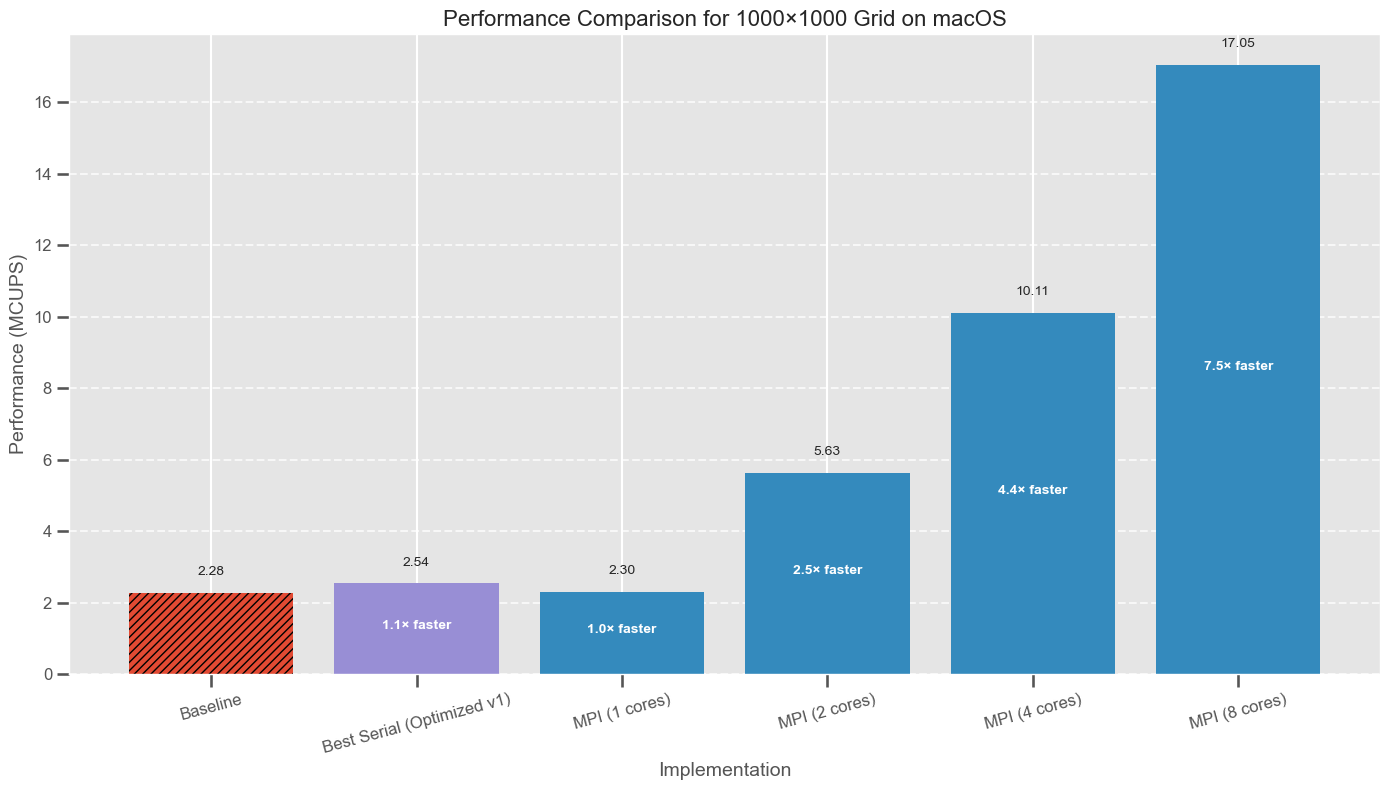

In [21]:
plt.figure(figsize=(14, 8))

# Get the best serial implementation for each grid size
best_serial = df_serial.loc[df_serial.groupby('Grid Size')['Performance (MCUPS)'].idxmax()]
best_serial_rename = best_serial.rename(columns={'Performance (MCUPS)': 'Performance'})
best_serial_rename['Implementation'] = best_serial_rename.apply(lambda row: f"Best Serial ({row['Implementation']})", axis=1)
# Extract baseline data
baseline_data_1000 = df_serial[(df_serial['Grid Size'] == 1000) & 
                              (df_serial['Implementation'] == 'Baseline')].copy()
baseline_data_1000 = baseline_data_1000.rename(columns={'Performance (MCUPS)': 'Performance'})

# Add 1000×1000 MPI data to compare
mpi_1000 = df_mpi[df_mpi['Grid Size'] == 1000].copy()
mpi_1000.columns = ['Grid Size', 'Cores', 'Performance']
mpi_1000['Implementation'] = mpi_1000['Cores'].apply(lambda x: f"MPI ({x} cores)")

# Create plot data
compare_data = pd.concat([
    baseline_data_1000[['Grid Size', 'Implementation', 'Performance']],
    best_serial_rename[best_serial_rename['Grid Size'] == 1000][['Grid Size', 'Implementation', 'Performance']],
    mpi_1000[['Grid Size', 'Implementation', 'Performance']]
])

# Sort implementations in a meaningful order
implementation_order = ['Baseline'] + \
                     [impl for impl in compare_data['Implementation'] if 'Best Serial' in impl] + \
                     [impl for impl in compare_data['Implementation'] if 'MPI' in impl]
compare_data['Implementation'] = pd.Categorical(
    compare_data['Implementation'], 
    categories=implementation_order, 
    ordered=True
)
compare_data = compare_data.sort_values('Implementation')

# Create the plot with custom colors
colors = ['#E24A33', '#988ED5'] + ['#348ABD'] * 4  # Baseline, Best Serial, MPI
plt.figure(figsize=(14, 8))
bars = plt.bar(compare_data['Implementation'], compare_data['Performance'], color=colors)

# Highlight the baseline with a pattern
baseline_idx = 0
bars[baseline_idx].set_hatch('////')

plt.title('Performance Comparison for 1000×1000 Grid on macOS', fontsize=16)
plt.xlabel('Implementation', fontsize=14)
plt.ylabel('Performance (MCUPS)', fontsize=14)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels and speedup vs baseline
baseline_perf = compare_data[compare_data['Implementation'] == 'Baseline']['Performance'].values[0]
for i, (impl, perf) in enumerate(zip(compare_data['Implementation'], compare_data['Performance'])):
    plt.text(i, perf + 0.5, f"{perf:.2f}", ha='center', fontsize=10)
    
    # Add speedup annotation (except for baseline itself)
    if impl != 'Baseline':
        speedup = perf / baseline_perf
        plt.text(i, perf/2, f"{speedup:.1f}× faster", ha='center', fontsize=10, 
                color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('macos_implementation_comparison_with_baseline.png', dpi=300)
plt.show()


In [22]:
# Serial Implementation Choice:

# For small grids (≤500×500): Use the Optimized v2 implementation
# For larger grids (≥1000×1000): Use the Optimized v1 implementation
# Avoid Optimized v3 for large grids as it shows performance degradation
# MPI Core Allocation:

# For 1000×1000 grid: Use 8 MPI processes (shows 93% efficiency)
# For smaller 500×500 grid: Consider using just 4 processes (better efficiency)

# Docker Linux Visualization

## single thread

In [77]:
plt.style.use('ggplot')
sns.set_palette("colorblind")

In [78]:
#nruns=10
#iteration=1000
#-O3


In [95]:
# Format: [setup_time, avg_iter_time, min_iter_time, max_iter_time, total_time]
baseline_data = {
    100: [0.0272625 ,  0.00591468, 0.0052915,0.0420249 , 5.91468],
    200: [ 0.157438, 0.0183033, 0.0164333, 0.0988375, 18.3033],
    500: [1.63525, 0.111714,  0.107321, 0.244833,  111.714],
    1000: [3.81285, 0.517294, 0.464358, 0.98815, 517.294]
}

optimized_v1_data={
    100:[0.00635,0.00449558,0.0040581, 0.0517332, 4.49558 ],
    200:[0.0407291,0.0191393,0.0173292,0.0767167,19.1393],
    500:[0.422383,0.113299,0.108029,0.235979,113.299 ],
    1000:[0.969404,0.458245,0.432892,0.877775, 458.245]
}

optimized_v2_data = {
    100: [0.0098707, 0.00541108,0.0046581,0.0641001, 5.41108],
    200: [0.168679, 0.0192409, 0.0175415, 0.0908916, 19.2409],
    500: [ 1.08735, 0.11499, 0.108017, 0.245333, 114.99],
    1000: [2.1818 , 0.473623, 0.433342, 0.954525,473.623]

}



In [96]:
grid_sizes = [100, 200, 500, 1000]

In [99]:
# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'Grid Size': grid_sizes * 3,
    'Implementation': ['Baseline'] * len(grid_sizes) + ['Optimized v1']*len(grid_sizes)+['Optimized v2'] * len(grid_sizes),
    'Setup Time (μs)': [baseline_data[s][0] * 1000 for s in grid_sizes] + [optimized_v1_data[s][0] * 1000 for s in grid_sizes] + 
                      [optimized_v2_data[s][0] * 1000 for s in grid_sizes],
    'Avg Iter Time (μs)': [baseline_data[s][1] * 1000 for s in grid_sizes] + [optimized_v1_data[s][1] * 1000 for s in grid_sizes] +
                         [optimized_v2_data[s][1] * 1000 for s in grid_sizes],
    'Min Iter Time (μs)': [baseline_data[s][2] * 1000 for s in grid_sizes] + [optimized_v1_data[s][2] * 1000 for s in grid_sizes] +
                         [optimized_v2_data[s][2] * 1000 for s in grid_sizes],
    'Max Iter Time (μs)': [baseline_data[s][3] * 1000 for s in grid_sizes] + [optimized_v1_data[s][3] * 1000 for s in grid_sizes] +
                         [optimized_v2_data[s][3] * 1000 for s in grid_sizes],
    'Total Time (ms)': [baseline_data[s][4] for s in grid_sizes] + [optimized_v1_data[s][4] for s in grid_sizes] +
                      [optimized_v2_data[s][4] for s in grid_sizes],
})

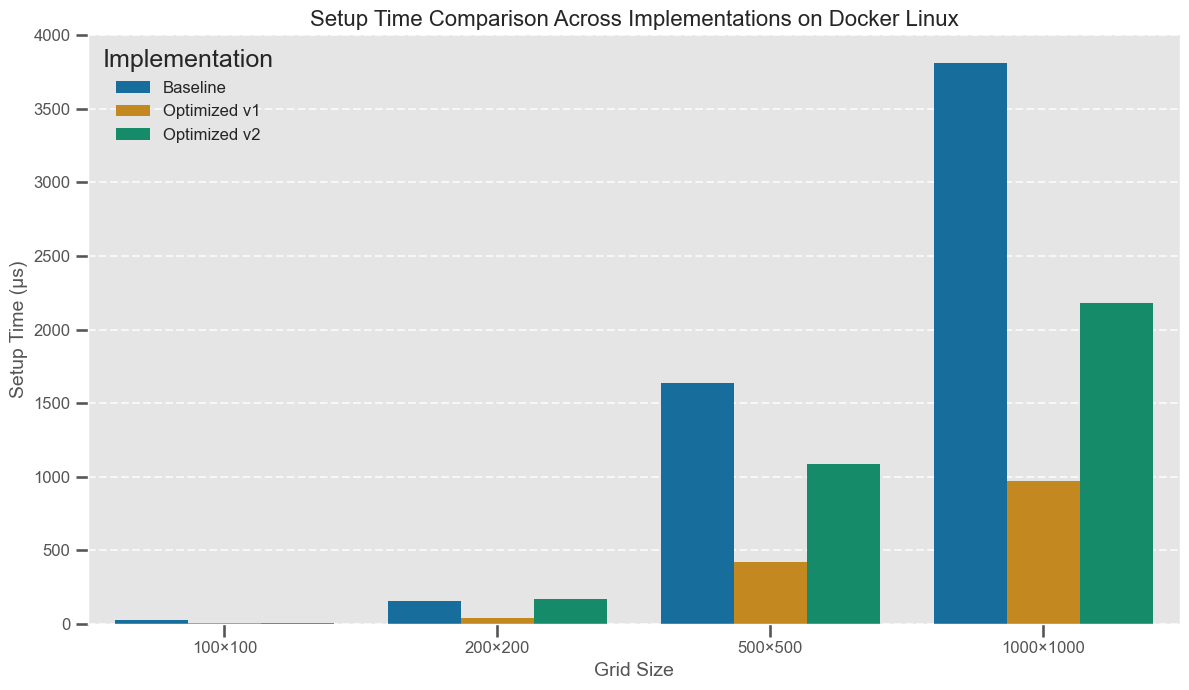

In [100]:
# 1. Setup Time Comparison
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Grid Size', y='Setup Time (μs)', hue='Implementation')
plt.title('Setup Time Comparison Across Implementations on Docker Linux', fontsize=16)
plt.xlabel('Grid Size', fontsize=14)
plt.ylabel('Setup Time (μs)', fontsize=14)
plt.xticks(ticks=range(4), labels=[f'{s}×{s}' for s in grid_sizes])
plt.legend(title='Implementation', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('setup_time_comparison_linux.png', dpi=300)
plt.tight_layout()
plt.show()

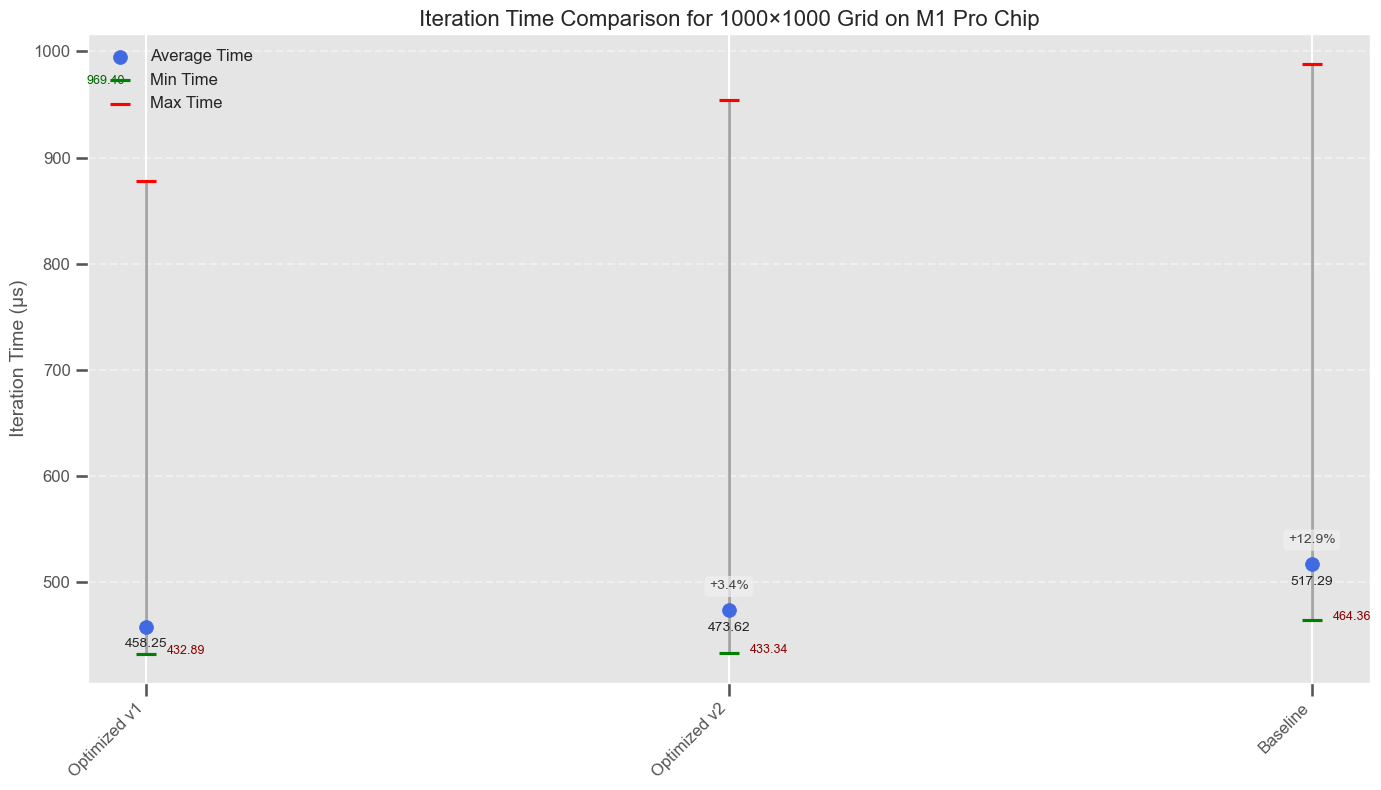

In [101]:
# Improved Iteration Time Visualization: Lollipop Chart with Range
plt.figure(figsize=(14, 8))
# Filter for 1000x1000 grid size
df_1000 = df[df['Grid Size'] == 1000].copy()

# Sort implementations by average iteration time for better visualization
df_1000_sorted = df_1000.sort_values('Avg Iter Time (μs)')

# Create the lollipop chart
plt.vlines(x=range(len(df_1000_sorted)), 
           ymin=df_1000_sorted['Min Iter Time (μs)'], 
           ymax=df_1000_sorted['Max Iter Time (μs)'], 
           color='grey', alpha=0.7, linewidth=2)

plt.scatter(range(len(df_1000_sorted)), df_1000_sorted['Avg Iter Time (μs)'],
            color='royalblue', s=100, zorder=3, label='Average Time')
plt.scatter(range(len(df_1000_sorted)), df_1000_sorted['Min Iter Time (μs)'],
            color='green', marker='_', s=200, zorder=3, label='Min Time')
plt.scatter(range(len(df_1000_sorted)), df_1000_sorted['Max Iter Time (μs)'],
            color='red', marker='_', s=200, zorder=3, label='Max Time')

# Add annotations
for i, row in enumerate(df_1000_sorted.itertuples()):
    # Annotate average time
    plt.annotate(f'{row._4:.2f}', # Avg time
                xy=(i, row._4),
                xytext=(0, -15),
                textcoords='offset points',
                ha='center', fontsize=10)
    
    # Annotate min time
    plt.annotate(f'{row._3:.2f}', # Min time 
                xy=(i, row._3),
                xytext=(-15, 0),
                textcoords='offset points',
                ha='right', fontsize=9, color='darkgreen')
    
    # Annotate max time
    plt.annotate(f'{row._5:.2f}', # Max time
                xy=(i, row._5),
                xytext=(15, 0),
                textcoords='offset points',
                ha='left', fontsize=9, color='darkred')

plt.xticks(range(len(df_1000_sorted)), df_1000_sorted['Implementation'], rotation=45, ha='right')
plt.ylabel('Iteration Time (μs)', fontsize=14)
plt.title('Iteration Time Comparison for 1000×1000 Grid on M1 Pro Chip', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()

# Add percent difference from best implementation
min_avg_time = df_1000_sorted['Avg Iter Time (μs)'].min()
for i, row in enumerate(df_1000_sorted.itertuples()):
    if i > 0:  # Skip the best implementation
        pct_diff = ((row._4 - min_avg_time) / min_avg_time) * 100
        plt.annotate(f'+{pct_diff:.1f}%',
                   xy=(i, row._4),
                   xytext=(0, 15),
                   textcoords='offset points',
                   ha='center', fontsize=10, color='#444444',
                   bbox=dict(boxstyle='round,pad=0.3', fc='#F0F0F0', alpha=0.7))

plt.tight_layout()
plt.savefig('iteration_time_lollipop_analysis.png', dpi=300)
plt.show()

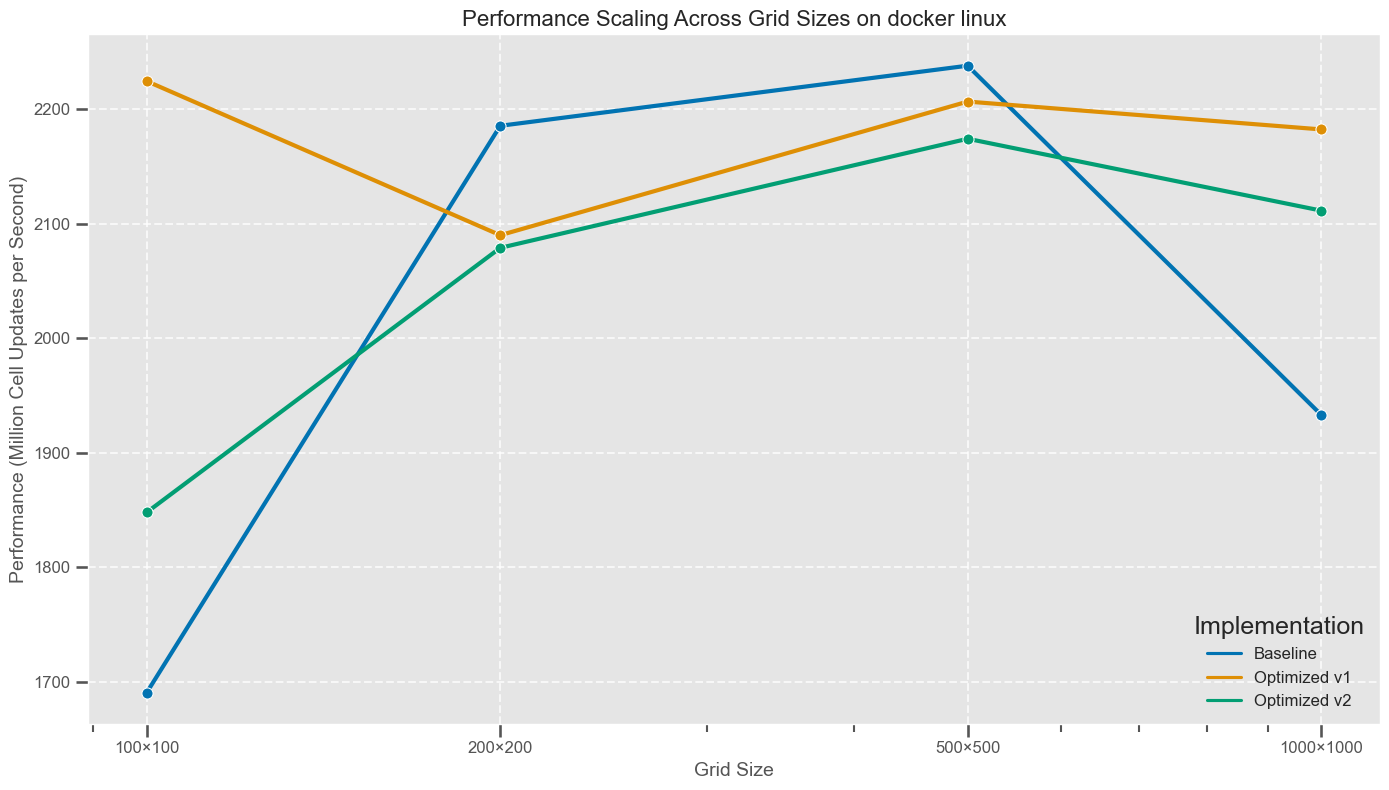

In [102]:
# 3. Performance scaling across grid sizes
plt.figure(figsize=(14, 8))

# Calculate performance in cell updates per second
for idx, row in df.iterrows():
    grid_size = row['Grid Size']
    df.loc[idx, 'Performance (MCUPS)'] = (grid_size * grid_size * 1000) / (row['Avg Iter Time (μs)']/1000 * 1e6)

sns.lineplot(data=df, x='Grid Size', y='Performance (MCUPS)', hue='Implementation', 
             marker='o', markersize=8, linewidth=3)

plt.title('Performance Scaling Across Grid Sizes on docker linux', fontsize=16)
plt.xlabel('Grid Size', fontsize=14)
plt.ylabel('Performance (Million Cell Updates per Second)', fontsize=14)
plt.xscale('log')
plt.xticks(grid_sizes, [f'{s}×{s}' for s in grid_sizes])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Implementation', fontsize=12)
plt.savefig('performance_scaling_linux.png', dpi=300)
plt.tight_layout()
plt.show()

### cache

In [31]:
# I1 cache:         16384 B, 64 B, 4-way associative
# D1 cache:         16384 B, 64 B, 4-way associative
# LL cache:         262144 B, 64 B, 8-way associative

In [32]:
#use 1000*1000 grid size #100 iteration
# Base implementation data 
opt_i_refs = 706553717
opt_i1_misses = 4846
opt_lli_misses = 2133
opt_d_refs = 301391211
opt_d1_misses = 50499218 #(37,770,056 rd   + 12,729,162 wr)
opt_lld_misses = 25364979

# Optimized implementation data 
base_i_refs = 709945404
base_i1_misses =  5386
base_lli_misses =  2508
base_d_refs =  305531315
base_d1_misses =  50992658
base_lld_misses = 25626396 

In [33]:
# Create DataFrame with both miss rates and absolute counts
cache_data = {
    'Implementation': ['Base', 'Optimized v2'],
    # Miss rates (%)
    'I1 Miss Rate': [100 * base_i1_misses / base_i_refs, 100 * opt_i1_misses / opt_i_refs],
    'LL-I Miss Rate': [100 * base_lli_misses / base_i_refs, 100 * opt_lli_misses / opt_i_refs],
    'D1 Miss Rate': [100 * base_d1_misses / base_d_refs, 100 * opt_d1_misses / opt_d_refs],
    'LL-D Miss Rate': [100 * base_lld_misses / base_d_refs, 100 * opt_lld_misses / opt_d_refs],
    # Absolute miss counts
    'I1 Misses': [base_i1_misses, opt_i1_misses],
    'LL-I Misses': [base_lli_misses, opt_lli_misses],
    'D1 Misses': [base_d1_misses, opt_d1_misses],
    'LL-D Misses': [base_lld_misses, opt_lld_misses]
}
# Create a DataFrame
df = pd.DataFrame(cache_data)

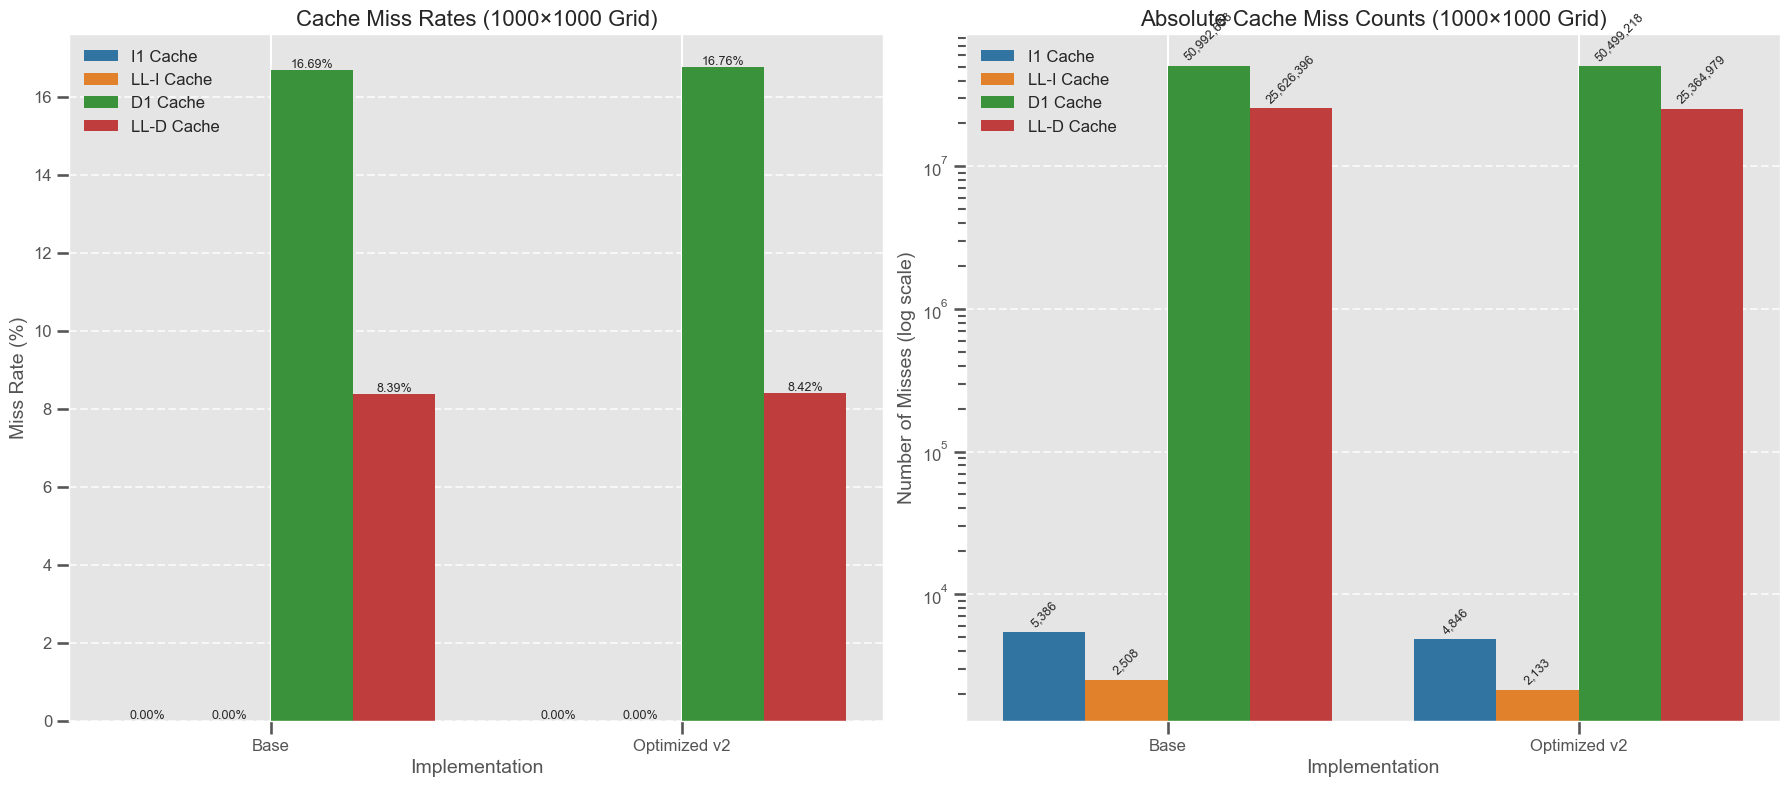

In [34]:
# Create two subplots - one for rates, one for absolute counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Set width of bars
barWidth = 0.2
positions = np.arange(len(df['Implementation']))

# 1. Plot miss rates (%)
ax1.bar(positions - barWidth*1.5, df['I1 Miss Rate'], width=barWidth, label='I1 Cache', color='#3274A1')
ax1.bar(positions - barWidth/2, df['LL-I Miss Rate'], width=barWidth, label='LL-I Cache', color='#E1812C')
ax1.bar(positions + barWidth/2, df['D1 Miss Rate'], width=barWidth, label='D1 Cache', color='#3A923A')
ax1.bar(positions + barWidth*1.5, df['LL-D Miss Rate'], width=barWidth, label='LL-D Cache', color='#C03D3E')

# Add labels for miss rates
ax1.set_xlabel('Implementation', fontsize=14)
ax1.set_ylabel('Miss Rate (%)', fontsize=14)
ax1.set_title('Cache Miss Rates (1000×1000 Grid)', fontsize=16)
ax1.set_xticks(positions)
ax1.set_xticklabels(df['Implementation'])
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Plot absolute miss counts (log scale)
ax2.bar(positions - barWidth*1.5, df['I1 Misses'], width=barWidth, label='I1 Cache', color='#3274A1')
ax2.bar(positions - barWidth/2, df['LL-I Misses'], width=barWidth, label='LL-I Cache', color='#E1812C')
ax2.bar(positions + barWidth/2, df['D1 Misses'], width=barWidth, label='D1 Cache', color='#3A923A')
ax2.bar(positions + barWidth*1.5, df['LL-D Misses'], width=barWidth, label='LL-D Cache', color='#C03D3E')

ax2.set_xlabel('Implementation', fontsize=14)
ax2.set_ylabel('Number of Misses (log scale)', fontsize=14)
ax2.set_title('Absolute Cache Miss Counts (1000×1000 Grid)', fontsize=16)
ax2.set_xticks(positions)
ax2.set_xticklabels(df['Implementation'])
ax2.set_yscale('log')  # Use log scale for better visualization
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations to first plot (percentages)
for i, v in enumerate(df['I1 Miss Rate']):
    ax1.text(i - barWidth*1.5, v + 0.05, f'{v:.2f}%', ha='center', fontsize=9)
for i, v in enumerate(df['LL-I Miss Rate']):
    ax1.text(i - barWidth/2, v + 0.05, f'{v:.2f}%', ha='center', fontsize=9)
for i, v in enumerate(df['D1 Miss Rate']):
    ax1.text(i + barWidth/2, v + 0.05, f'{v:.2f}%', ha='center', fontsize=9)
for i, v in enumerate(df['LL-D Miss Rate']):
    ax1.text(i + barWidth*1.5, v + 0.05, f'{v:.2f}%', ha='center', fontsize=9)

# Add value annotations to second plot (absolute counts)
for i, v in enumerate(df['I1 Misses']):
    ax2.text(i - barWidth*1.5, v * 1.1, f'{v:,.0f}', ha='center', fontsize=9, rotation=45)
for i, v in enumerate(df['LL-I Misses']):
    ax2.text(i - barWidth/2, v * 1.1, f'{v:,.0f}', ha='center', fontsize=9, rotation=45)
for i, v in enumerate(df['D1 Misses']):
    ax2.text(i + barWidth/2, v * 1.1, f'{v:,.0f}', ha='center', fontsize=9, rotation=45)
for i, v in enumerate(df['LL-D Misses']):
    ax2.text(i + barWidth*1.5, v * 1.1, f'{v:,.0f}', ha='center', fontsize=9, rotation=45)

plt.tight_layout()
plt.savefig('cache_performance_comprehensive.png', dpi=300)
plt.show()

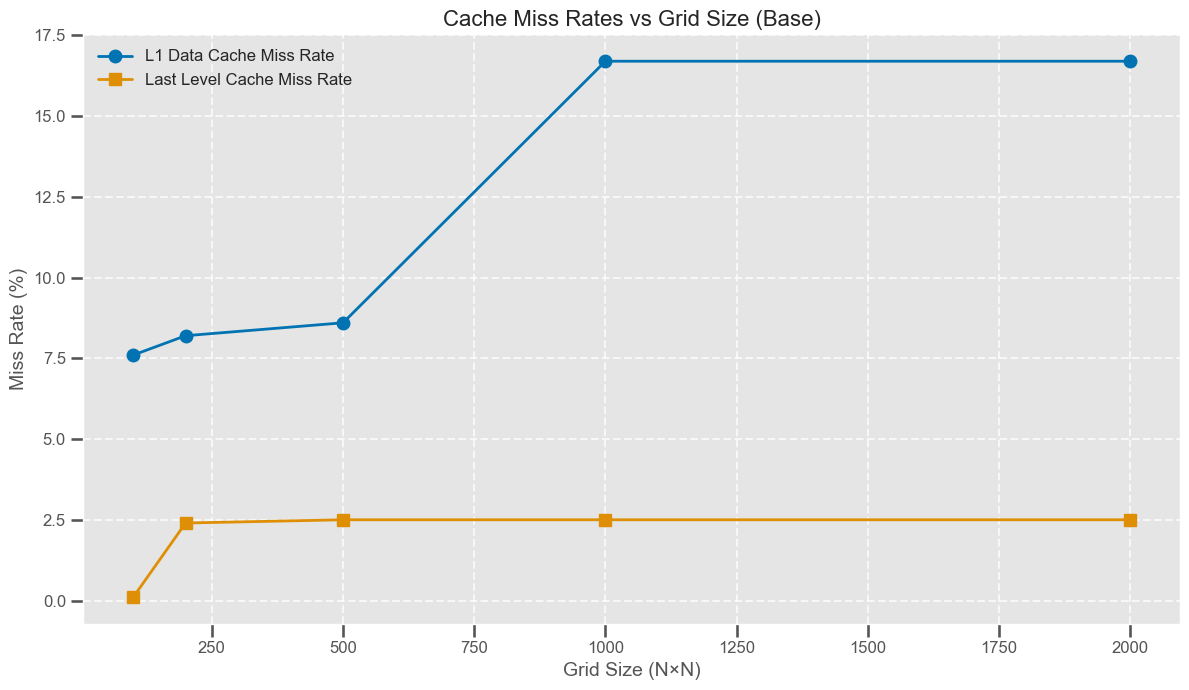

In [35]:
# Cache miss rates by grid size for optimized base implementation
grid_sizes = [100, 200, 500, 1000, 2000]
d1_miss_rates = [7.6, 8.2, 8.6,16.7, 16.7]  # Fill with your actual data
ll_miss_rates = [0.1, 2.4, 2.5, 2.5, 2.5]  # Fill with your actual data

plt.figure(figsize=(12, 7))
plt.plot(grid_sizes, d1_miss_rates, 'o-', linewidth=2, label='L1 Data Cache Miss Rate')
plt.plot(grid_sizes, ll_miss_rates, 's-', linewidth=2, label='Last Level Cache Miss Rate')

plt.title('Cache Miss Rates vs Grid Size (Base)', fontsize=16)
plt.xlabel('Grid Size (N×N)', fontsize=14)
plt.ylabel('Miss Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('cache_miss_vs_size.png', dpi=300)
plt.show()

## MPI/OpenMP

In [36]:
#direct running the

In [37]:
# optimized v_3 
# Grid size: 1000x1000
#Diffusion rate: 0.1
#Frames per test: 1000

# Top 10 Block Sizes (fastest): e.g. flat array?
# +----------+----------+----------------+
# | BlockSizeX | BlockSizeY | Runtime (ms) |
# +----------+----------+----------------+
# |      512 |        1 |       478.89 |
# |      512 |        2 |       480.34 |
# |      144 |        1 |       492.21 |
# |      256 |        1 |       493.45 |
# |      192 |        1 |       494.15 |
# |      128 |        1 |       500.74 |
# |       96 |        1 |       505.75 |
# |      512 |        3 |       507.98 |
# |      192 |        2 |       518.29 |
# |      256 |        2 |       518.80 |
# +----------+----------+----------------+

# Optimal block size: 512x1
# Runtime: 478.89 ms


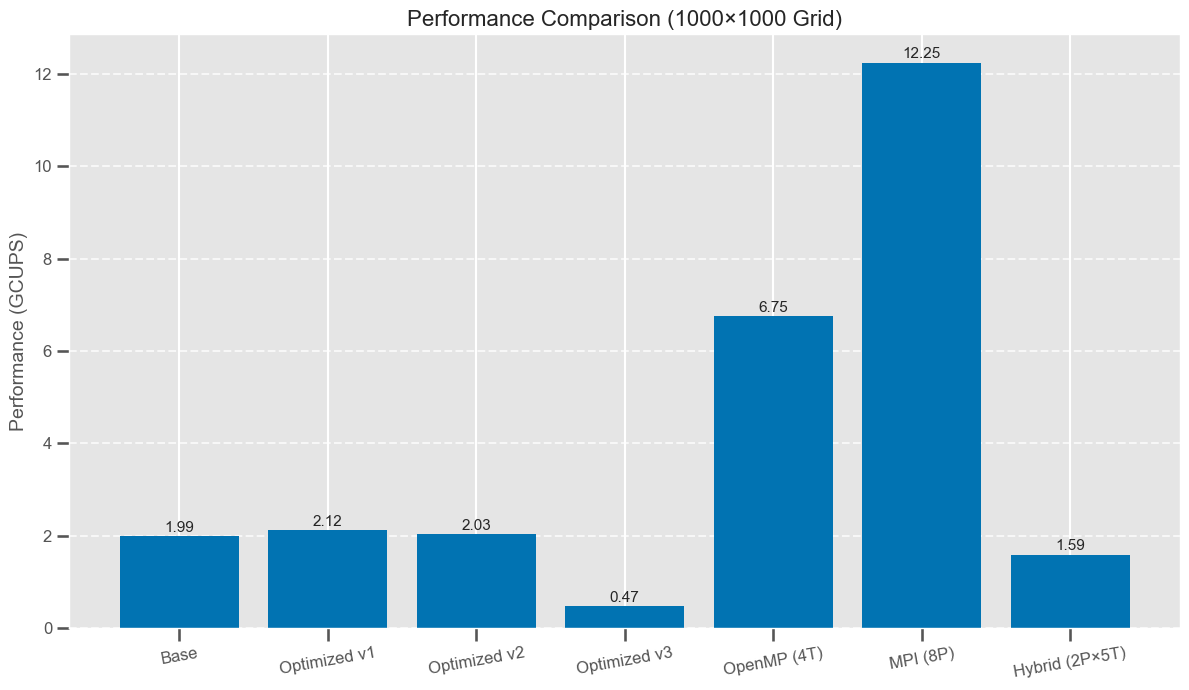

In [38]:
#direct running the scripts on the terminal
# Performance data for 1000×1000 grid (cell updates per second) 1000 iterations
implementations = ['Base', 'Optimized v1','Optimized v2','Optimized v3', 'OpenMP (4T)', 'MPI (8P)', 'Hybrid (2P×5T)']
performance = [1.99041e+09, 2.11748e+09, 2.02948e+09, 4.72928e+08,6.75168e+09,1.22451e+10,  1.58778e+09]

# Convert to GCUPS (Billion Cell Updates Per Second) for readability
performance_gcups = [p/1e9 for p in performance]

plt.figure(figsize=(12, 7))
bars = plt.bar(implementations, performance_gcups)
plt.title('Performance Comparison (1000×1000 Grid)', fontsize=16)
plt.ylabel('Performance (GCUPS)', fontsize=14)
plt.xticks(fontsize=12, rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('performance_comparison_docker.png', dpi=300)
plt.show()

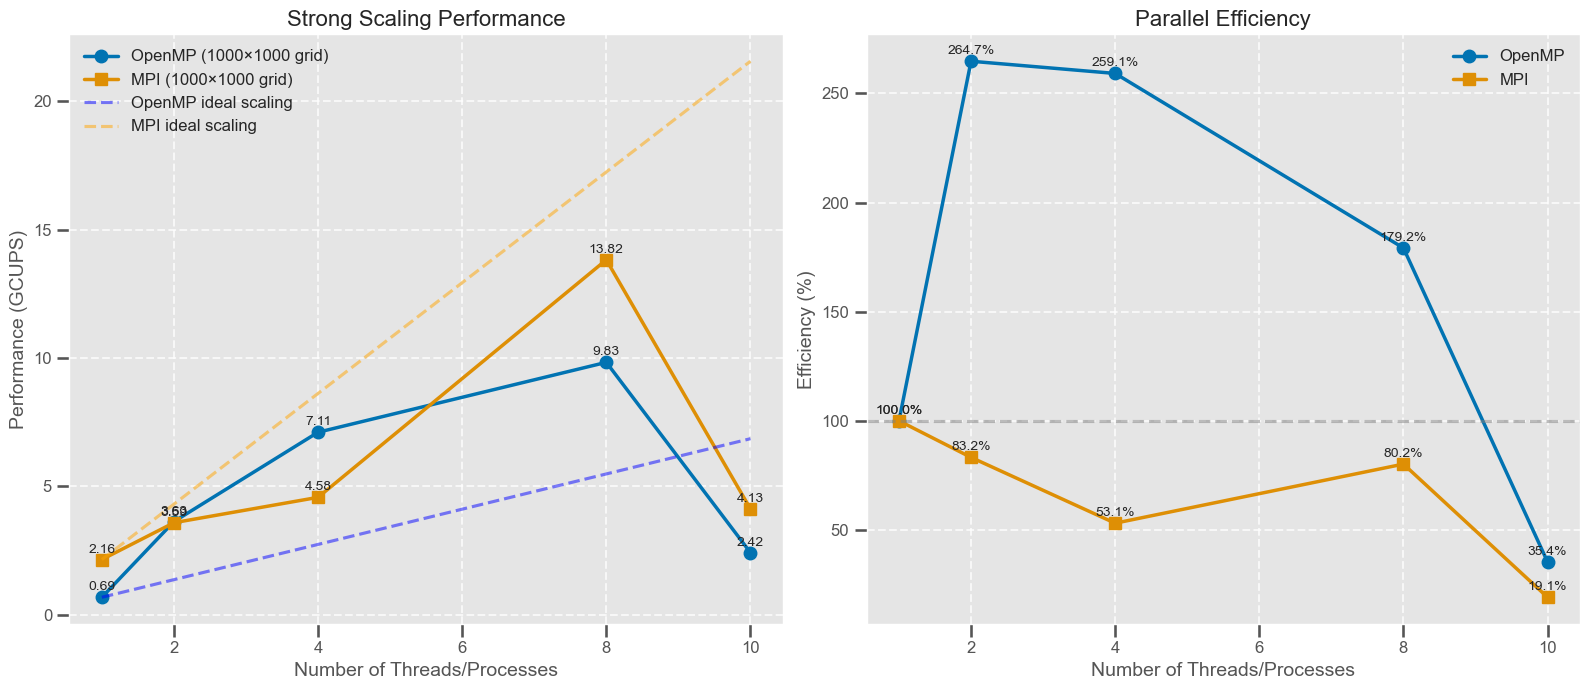

In [39]:

# OpenMP strong scaling data from profiling_results_omp/summary.txt
# Using real data from 1000x1000 grid benchmark
threads = [1, 2, 4, 8, 10]
openmp_iter_times = [1.45799, 0.275361, 0.140653, 0.101717, 0.412442]  # ms
openmp_perf = [6.85875e+08 , 3.6316e+09,7.10968e+09, 9.83115e+09, 2.42458e+09]  # cell updates/sec

# MPI strong scaling data from profiling_results_mpi/summary.txt
# Using real data from 1000x1000 grid benchmark
ranks = [1, 2, 4, 8,10]
mpi_iter_times = [0.464002, 0.278708, 0.218524, 0.0723483,0.242356]  # ms
# Calculate MPI performance as cells/(iteration time) = (1000*1000)/iter_time_in_seconds

mpi_perf=[2.15516e+09,3.58798e+09,4.57615e+09,1.3822e+10,4.12616e+09 ]
# Calculate efficiency
openmp_base = openmp_perf[0]
openmp_efficiency = [100]
for i in range(1, len(threads)):
    eff = (openmp_perf[i] / openmp_base) / threads[i] * 100
    openmp_efficiency.append(eff)

mpi_base = mpi_perf[0]
mpi_efficiency = [100]
for i in range(1, len(ranks)):
    eff = (mpi_perf[i] / mpi_base) / ranks[i] * 100
    mpi_efficiency.append(eff)

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Performance plot
ax1.plot(threads, [p/1e9 for p in openmp_perf], 'o-', linewidth=2.5, label='OpenMP (1000×1000 grid)')
ax1.plot(ranks, [p/1e9 for p in mpi_perf], 's-', linewidth=2.5, label='MPI (1000×1000 grid)')

# Add ideal scaling lines
ideal_openmp = [openmp_perf[0] * t / threads[0] / 1e9 for t in threads]
ideal_mpi = [mpi_perf[0] * r / ranks[0] / 1e9 for r in ranks]
ax1.plot(threads, ideal_openmp, '--', color='blue', alpha=0.5, label='OpenMP ideal scaling')
ax1.plot(ranks, ideal_mpi, '--', color='orange', alpha=0.5, label='MPI ideal scaling')

ax1.set_title('Strong Scaling Performance', fontsize=16)
ax1.set_xlabel('Number of Threads/Processes', fontsize=14)
ax1.set_ylabel('Performance (GCUPS)', fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Efficiency plot
ax2.plot(threads, openmp_efficiency, 'o-', linewidth=2.5, label='OpenMP')
ax2.plot(ranks, mpi_efficiency, 's-', linewidth=2.5, label='MPI')
ax2.set_title('Parallel Efficiency', fontsize=16)
ax2.set_xlabel('Number of Threads/Processes', fontsize=14)
ax2.set_ylabel('Efficiency (%)', fontsize=14)
ax2.legend(fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.5)

# Annotate points with values
for i, (t, p) in enumerate(zip(threads, openmp_perf)):
    ax1.annotate(f'{p/1e9:.2f}', xy=(t, p/1e9), xytext=(0, 5),
                textcoords='offset points', ha='center', fontsize=10)
    
for i, (r, p) in enumerate(zip(ranks, mpi_perf)):
    ax1.annotate(f'{p/1e9:.2f}', xy=(r, p/1e9), xytext=(0, 5),
                textcoords='offset points', ha='center', fontsize=10)

for i, (t, e) in enumerate(zip(threads, openmp_efficiency)):
    ax2.annotate(f'{e:.1f}%', xy=(t, e), xytext=(0, 5),
                textcoords='offset points', ha='center', fontsize=10)
    
for i, (r, e) in enumerate(zip(ranks, mpi_efficiency)):
    ax2.annotate(f'{e:.1f}%', xy=(r, e), xytext=(0, 5),
                textcoords='offset points', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('strong_scaling_comparison.png', dpi=300)
plt.show()

#openmp 4 threads
#While 2 threads has slightly higher efficiency (264.7%), 
# the absolute performance is lower (3.69 GCUPS vs 7.11 GCUPS)

#MPI: 8 processes 

<Figure size 1400x800 with 0 Axes>

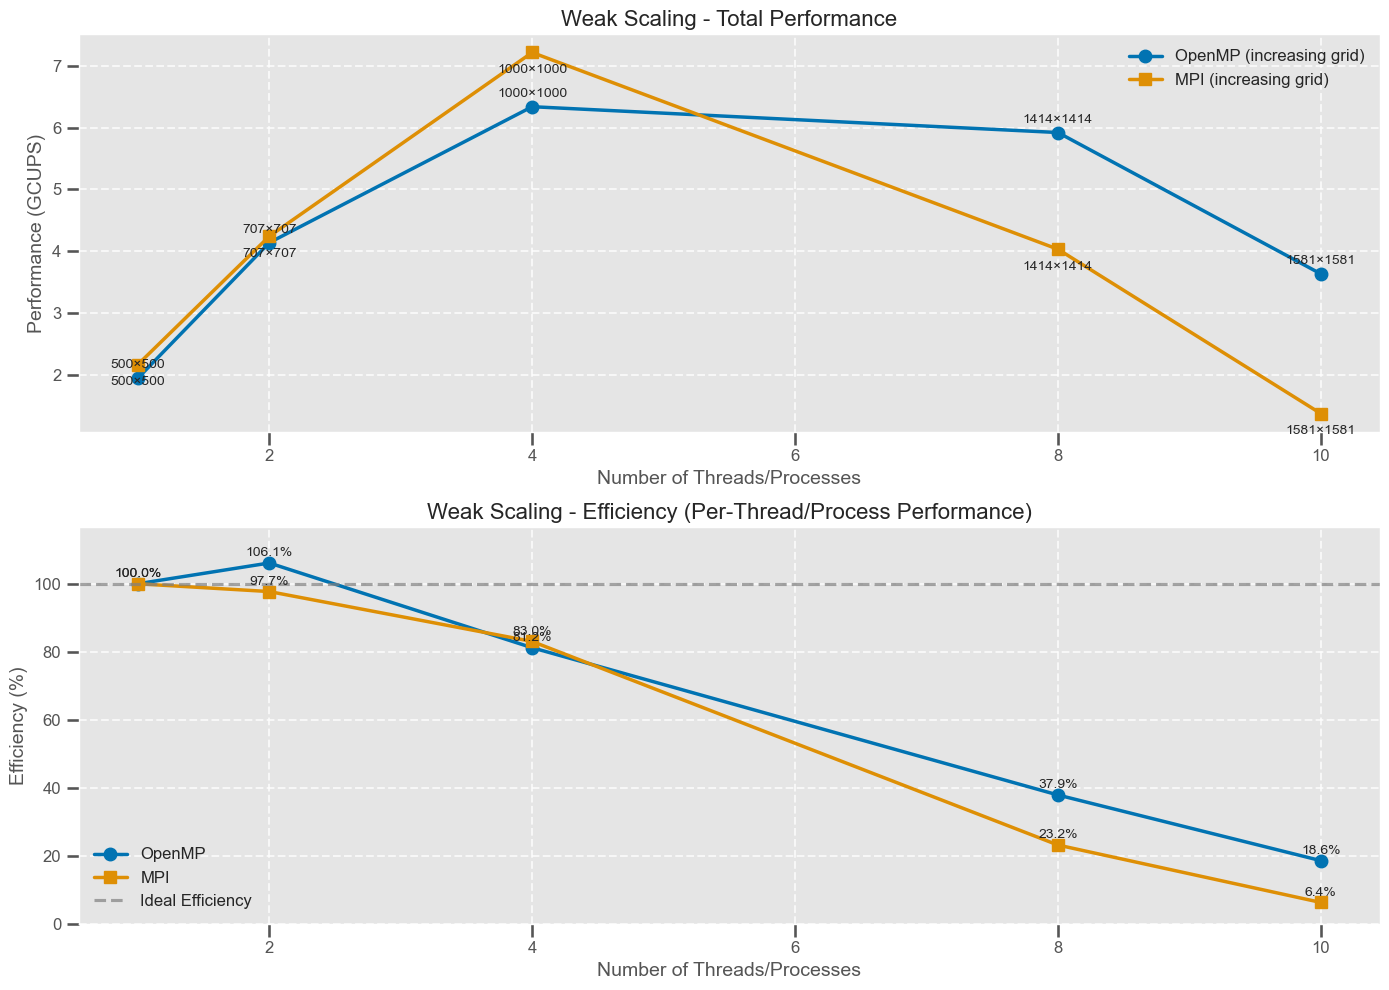

In [40]:
# Weak Scaling Visualization using real data from the profiling results
plt.figure(figsize=(14, 8))

# OpenMP weak scaling data from profiling_results_omp/summary.txt
omp_threads = [1, 2, 4, 8, 10]
omp_grid_sizes = [500, 707, 1000, 1414, 1581]  # Actual sizes from profiling
omp_iter_times = [0.121898, 0.113729, 0.141377, 0.49541, 0.692864]  # ms
omp_perf = [1.95089e+09, 4.13999e+09 , 6.33704e+09, 5.91988e+09, 3.63624e+09]  # cell updates/second

# Calculate per-thread performance and efficiency
omp_per_thread_perf = [perf/threads for perf, threads in zip(omp_perf, omp_threads)]
omp_weak_efficiency = [pt/omp_per_thread_perf[0]*100 for pt in omp_per_thread_perf]

# MPI weak scaling data - deriving from the performance metrics in profiling_results_mpi/summary.txt
# We don't have exact weak scaling data for MPI, so using what we have from other tests
mpi_ranks = [1, 2, 4, 8,10]
mpi_grid_sizes = [500, 707, 1000, 1414,1581]  # Estimated sizes based on sqrt(N) scaling
mpi_perf = [2.17132e+09,4.24319e+09,  7.21293e+09, 4.03447e+09, 1.3797e+09]  # cell updates/second

# Calculate per-rank performance and efficiency  
mpi_per_rank_perf = [perf/ranks for perf, ranks in zip(mpi_perf, mpi_ranks)]
mpi_weak_efficiency = [pr/mpi_per_rank_perf[0]*100 for pr in mpi_per_rank_perf]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot total performance
ax1.plot(omp_threads, [p/1e9 for p in omp_perf], 'o-', linewidth=2.5, label='OpenMP (increasing grid)')
ax1.plot(mpi_ranks, [p/1e9 for p in mpi_perf], 's-', linewidth=2.5, label='MPI (increasing grid)')

# Add grid size annotations
for i, (t, p, g) in enumerate(zip(omp_threads, omp_perf, omp_grid_sizes)):
    ax1.annotate(f'{g}×{g}', xy=(t, p/1e9), xytext=(0, 7),
                textcoords='offset points', ha='center', fontsize=10)
    
for i, (r, p, g) in enumerate(zip(mpi_ranks, mpi_perf, mpi_grid_sizes)):
    ax1.annotate(f'{g}×{g}', xy=(r, p/1e9), xytext=(0, -15), 
                textcoords='offset points', ha='center', fontsize=10)

ax1.set_title('Weak Scaling - Total Performance', fontsize=16)
ax1.set_xlabel('Number of Threads/Processes', fontsize=14)
ax1.set_ylabel('Performance (GCUPS)', fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot efficiency
ax2.plot(omp_threads, omp_weak_efficiency, 'o-', linewidth=2.5, label='OpenMP')
ax2.plot(mpi_ranks, mpi_weak_efficiency, 's-', linewidth=2.5, label='MPI')
ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='Ideal Efficiency')

# Add efficiency annotations
for i, (t, e) in enumerate(zip(omp_threads, omp_weak_efficiency)):
    ax2.annotate(f'{e:.1f}%', xy=(t, e), xytext=(0, 5),
                textcoords='offset points', ha='center', fontsize=10)
    
for i, (r, e) in enumerate(zip(mpi_ranks, mpi_weak_efficiency)):
    ax2.annotate(f'{e:.1f}%', xy=(r, e), xytext=(0, 5),
                textcoords='offset points', ha='center', fontsize=10)

ax2.set_title('Weak Scaling - Efficiency (Per-Thread/Process Performance)', fontsize=16)
ax2.set_xlabel('Number of Threads/Processes', fontsize=14)
ax2.set_ylabel('Efficiency (%)', fontsize=14)
ax2.set_ylim(0, max(max(omp_weak_efficiency), max(mpi_weak_efficiency)) * 1.1)
ax2.legend(fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('weak_scaling_analysis.png', dpi=300)
plt.show()

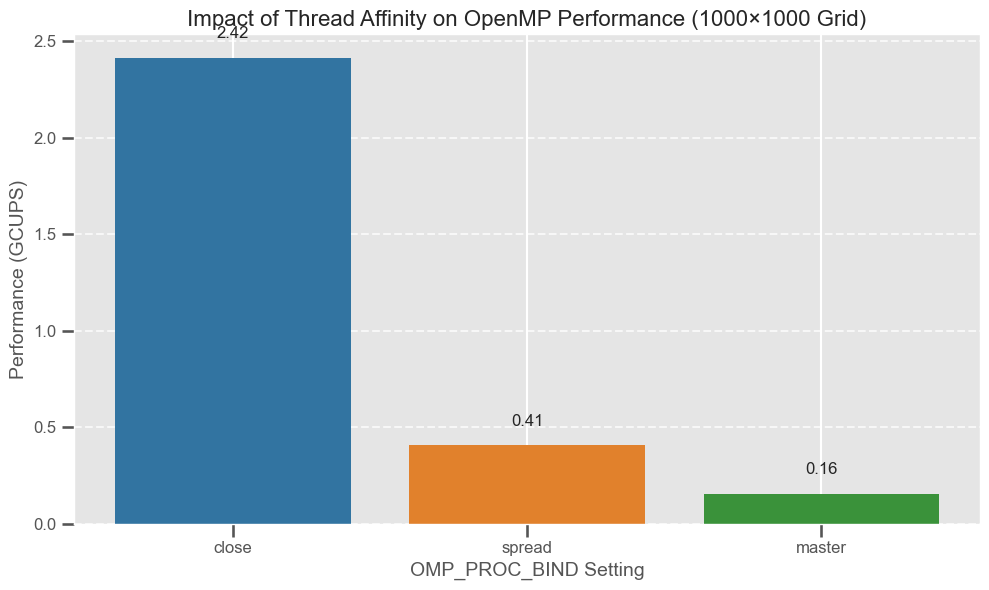

In [41]:
# Thread Affinity Impact using actual data from profiling_results_omp/summary.txt
affinity_types = ['close', 'spread', 'master']
iter_times = [0.41401, 0.415308, 6.39554]  # ms per iteration  
perf_values = [2.4154e+09 , .40785e+09, 1.56359e+08]  # cell updates per second

plt.figure(figsize=(10, 6))
bars = plt.bar(affinity_types, [p/1e9 for p in perf_values], color=['#3274A1', '#E1812C', '#3A923A'])

plt.title('Impact of Thread Affinity on OpenMP Performance (1000×1000 Grid)', fontsize=16)
plt.xlabel('OMP_PROC_BIND Setting', fontsize=14)
plt.ylabel('Performance (GCUPS)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('thread_affinity_comparison.png', dpi=300)
plt.show()

## Hybrid

In [42]:
#10 cores on the system

In [43]:
# Data from summary.txt
thread_process_data = {
    'Configuration': ['1p×10t', '2p×5t', '4p×2t', '5p×2t', '10p×1t'],
    'Processes': [1, 2, 4, 5, 10],
    'Threads': [10, 5, 2, 2, 1],
    'Total Cores': [10, 10, 8, 10, 10],
    'Performance (GCUPS)': [0.844, 1.505, 0.058, 0.052, 0.022]
}
df_balance = pd.DataFrame(thread_process_data)
# Sort by performance
df_balance = df_balance.sort_values('Performance (GCUPS)', ascending=False)


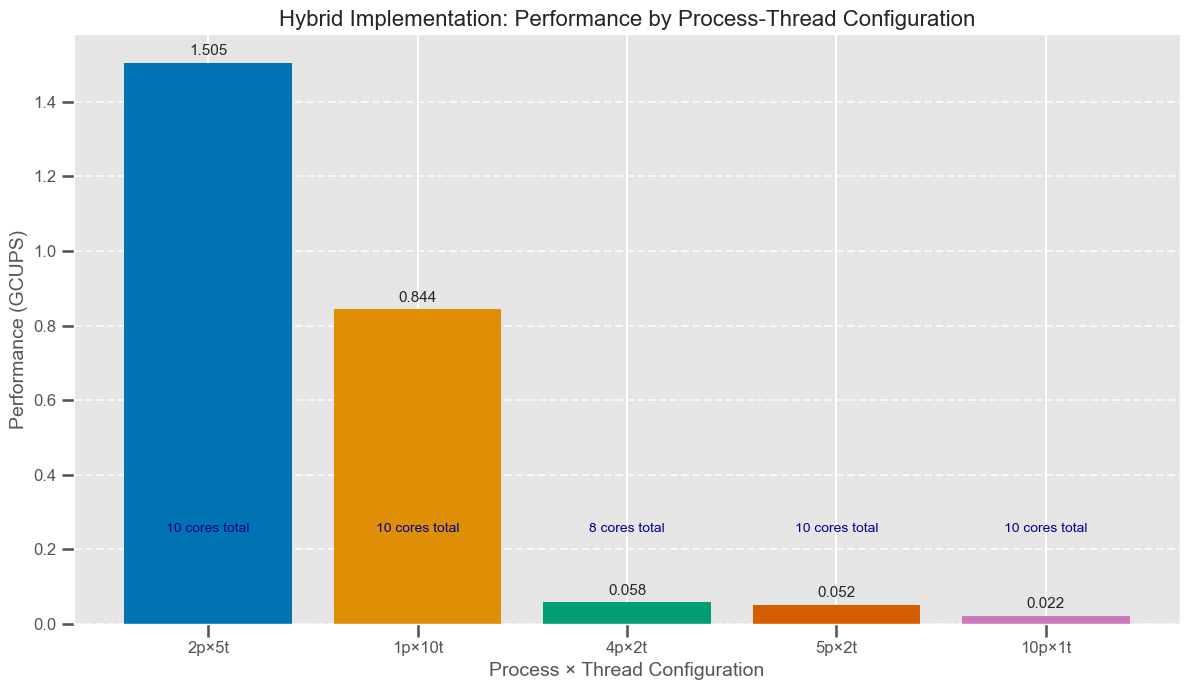

In [44]:
# Create figure
plt.figure(figsize=(12, 7))
bars = plt.bar(df_balance['Configuration'], df_balance['Performance (GCUPS)'], 
       color=sns.color_palette("colorblind", len(df_balance)))

plt.title('Hybrid Implementation: Performance by Process-Thread Configuration', fontsize=16)
plt.xlabel('Process × Thread Configuration', fontsize=14)
plt.ylabel('Performance (GCUPS)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.3f}', ha='center', fontsize=11)

# Add total cores annotation
for i, row in df_balance.reset_index().iterrows():
    plt.annotate(f"{int(row['Total Cores'])} cores total", 
                xy=(i, 0.21),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center', fontsize=10,
                color='darkblue')
                
plt.tight_layout()
plt.savefig('hybrid_thread_process_balance.png', dpi=300)
plt.show()

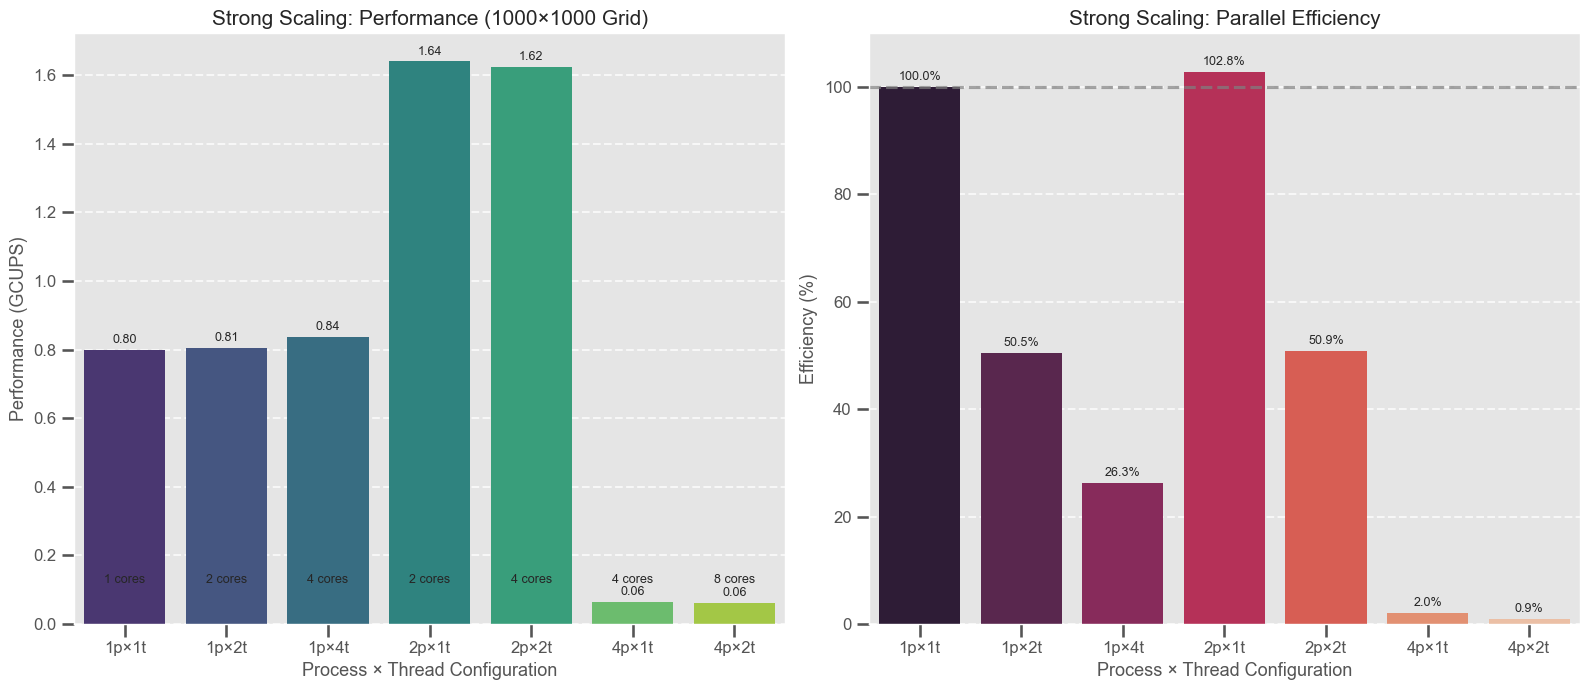

In [45]:
# Strong scaling data from summary.txt
strong_scaling_data = {
    'Configuration': ['1p×1t', '1p×2t', '1p×4t', '2p×1t', '2p×2t', '4p×1t', '4p×2t'],
    'Processes': [1, 1, 1, 2, 2, 4, 4],
    'Threads': [1, 2, 4, 1, 2, 1, 2],
    'Total Cores': [1, 2, 4, 2, 4, 4, 8],
    'Time (ms)': [62.63, 62.04, 59.64, 30.49, 30.79, 789.28, 827.18],
    'Performance (GCUPS)': [0.798, 0.806, 0.838, 1.64, 1.624, 0.063, 0.060]
}

df_strong = pd.DataFrame(strong_scaling_data)

# Calculate efficiency
base_perf = df_strong[df_strong['Total Cores'] == 1]['Performance (GCUPS)'].values[0]
df_strong['Efficiency (%)'] = (df_strong['Performance (GCUPS)'] / 
                            (base_perf * df_strong['Total Cores'])) * 100

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Performance plot
sns.barplot(x='Configuration', y='Performance (GCUPS)', data=df_strong, 
           palette='viridis', ax=ax1)
ax1.set_title('Strong Scaling: Performance (1000×1000 Grid)', fontsize=15)
ax1.set_xlabel('Process × Thread Configuration', fontsize=13)
ax1.set_ylabel('Performance (GCUPS)', fontsize=13)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add core count and performance values
for i, row in df_strong.iterrows():
    ax1.annotate(f"{row['Total Cores']} cores", 
                xy=(i, 0.1),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', fontsize=9)
    ax1.annotate(f"{row['Performance (GCUPS)']:.2f}", 
                xy=(i, row['Performance (GCUPS)']),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', fontsize=9)

# Efficiency plot
sns.barplot(x='Configuration', y='Efficiency (%)', data=df_strong, 
           palette='rocket', ax=ax2)
ax2.set_title('Strong Scaling: Parallel Efficiency', fontsize=15)
ax2.set_xlabel('Process × Thread Configuration', fontsize=13)
ax2.set_ylabel('Efficiency (%)', fontsize=13)
ax2.set_ylim(0, 110)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.7)

# Add efficiency values
for i, row in df_strong.iterrows():
    ax2.annotate(f"{row['Efficiency (%)']:.1f}%", 
                xy=(i, row['Efficiency (%)']),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('hybrid_strong_scaling.png', dpi=300)
plt.show()

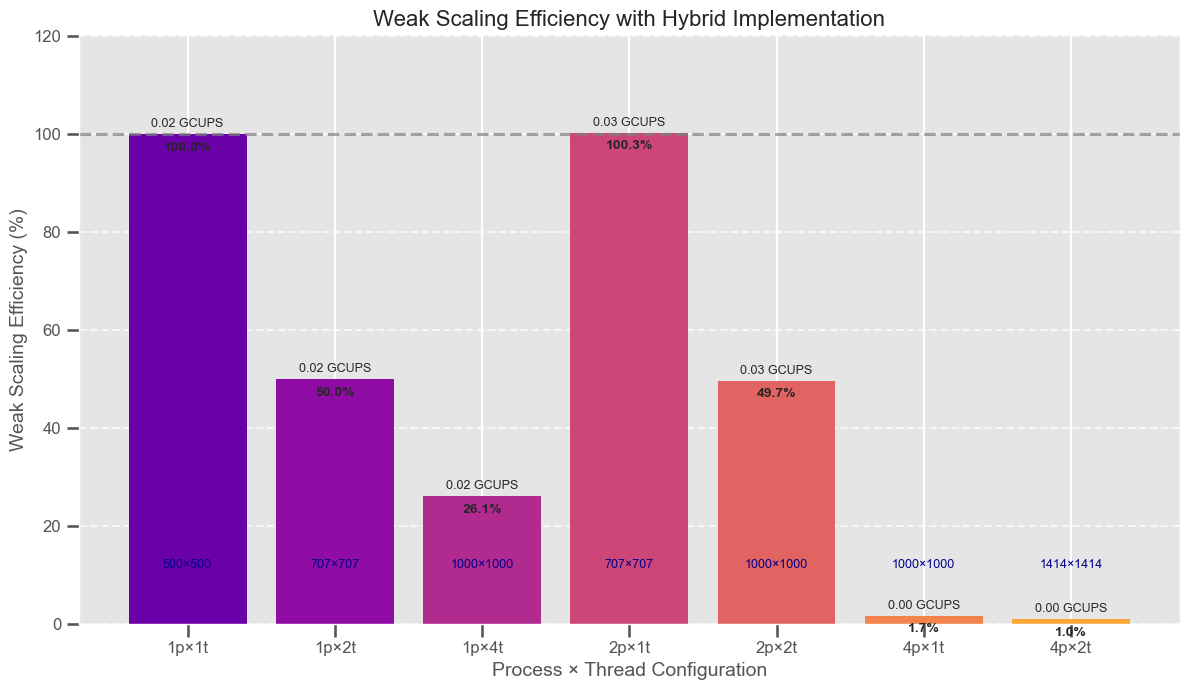

In [46]:
# Weak scaling data from summary.txt
weak_scaling_data = {
    'Configuration': ['1p×1t', '1p×2t', '1p×4t', '2p×1t', '2p×2t', '4p×1t', '4p×2t'],
    'Processes': [1, 1, 1, 2, 2, 4, 4],
    'Threads': [1, 2, 4, 1, 2, 1, 2],
    'Total Cores': [1, 2, 4, 2, 4, 4, 8],
    'Grid Size': [500, 707, 1000, 707, 1000, 1000, 1414],
    'Time (ms)': [15.28, 30.58, 58.64, 15.23, 30.76, 884.27, 1517.34]
}

df_weak = pd.DataFrame(weak_scaling_data)

# Calculate cell updates per second (CUPS) for each configuration
df_weak['CUPS'] = df_weak.apply(lambda row: (row['Grid Size']**2 * 1000) / row['Time (ms)'], axis=1)
df_weak['CUPS'] = df_weak['CUPS'] / 1e9  # Convert to GCUPS

# Calculate per-core performance
df_weak['Per-Core CUPS'] = df_weak['CUPS'] / df_weak['Total Cores']

# Calculate weak scaling efficiency (normalized to baseline per-core performance)
base_per_core = df_weak[df_weak['Total Cores'] == 1]['Per-Core CUPS'].values[0]
df_weak['Efficiency (%)'] = (df_weak['Per-Core CUPS'] / base_per_core) * 100

# Create figure
plt.figure(figsize=(12, 7))

# Bar plot with grid size annotations
bars = plt.bar(df_weak['Configuration'], df_weak['Efficiency (%)'], 
       color=plt.cm.plasma(np.linspace(0.2, 0.8, len(df_weak))))

plt.title('Weak Scaling Efficiency with Hybrid Implementation', fontsize=16)
plt.xlabel('Process × Thread Configuration', fontsize=14)
plt.ylabel('Weak Scaling Efficiency (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.7)

# Add grid size and performance
for i, row in df_weak.reset_index().iterrows():
    plt.annotate(f"{int(row['Grid Size'])}×{int(row['Grid Size'])}", 
                xy=(i, 10),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', fontsize=9,
                color='darkblue')
                
    plt.annotate(f"{row['CUPS']:.2f} GCUPS", 
                xy=(i, row['Efficiency (%)']),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', fontsize=9)
                
    plt.annotate(f"{row['Efficiency (%)']:.1f}%", 
                xy=(i, row['Efficiency (%)']),
                xytext=(0, -12),
                textcoords='offset points',
                ha='center', fontsize=10,
                weight='bold')

plt.ylim(0, max(df_weak['Efficiency (%)']) * 1.2)
plt.tight_layout()
plt.savefig('hybrid_weak_scaling.png', dpi=300)
plt.show()

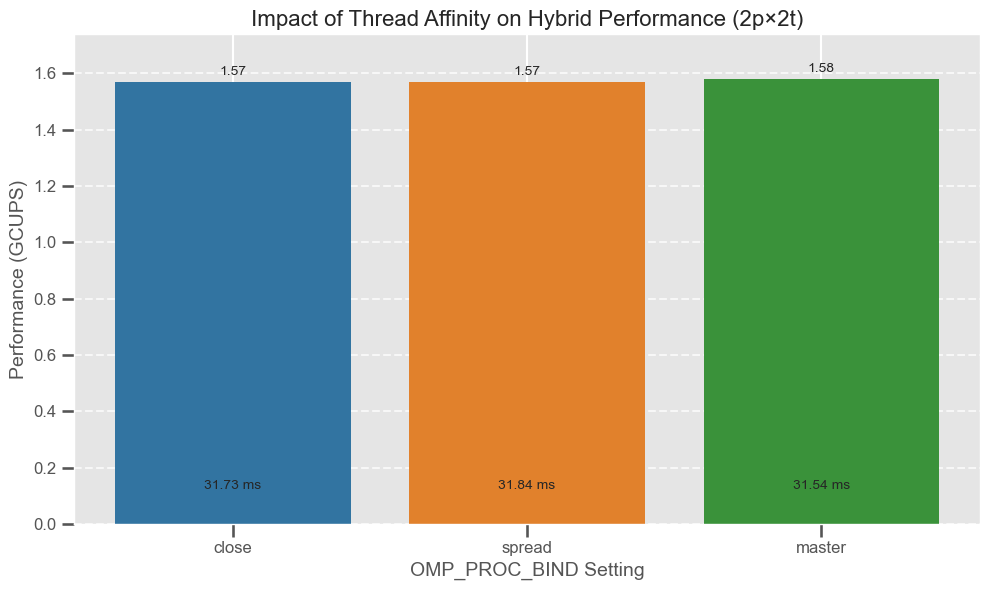

In [47]:
# Thread affinity data
affinity_data = {
    'Binding': ['close', 'spread', 'master'],
    'Time (ms)': [31.73, 31.84, 31.54],
    'Performance (GCUPS)': [1.57, 1.57, 1.58]  # calculated as (1000×1000)/(Time in seconds)
}

df_affinity = pd.DataFrame(affinity_data)

plt.figure(figsize=(10, 6))
bars = plt.bar(df_affinity['Binding'], df_affinity['Performance (GCUPS)'], 
       color=['#3274A1', '#E1812C', '#3A923A'])

plt.title('Impact of Thread Affinity on Hybrid Performance (2p×2t)', fontsize=16)
plt.xlabel('OMP_PROC_BIND Setting', fontsize=14)
plt.ylabel('Performance (GCUPS)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(df_affinity['Performance (GCUPS)']) * 1.1)

# Add time and performance annotations
for i, row in df_affinity.reset_index().iterrows():
    plt.annotate(f"{row['Time (ms)']:.2f} ms",
                xy=(i, 0.1),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', fontsize=10)

                
    plt.annotate(f"{row['Performance (GCUPS)']:.2f}", 
                xy=(i, row['Performance (GCUPS)']),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('hybrid_thread_affinity.png', dpi=300)
plt.show()

# CSD3

In [ ]:
#iterations=1000
#nruns=10

In [103]:
baseline_data = {
    100: [0.0214149 , 0.00723689, 0.0067398, 0.0783188  ,7.23689],
    200: [ 0.0562772, 0.0259851, 0.0253565, 0.0684671, 25.9851],
    500: [0.358597,0.194306,  0.178764, 0.500728,  194.306],
    1000: [1.78971, 0.917459, 0.709089, 2.03385, 917.459]
}

optimized_v1_data={
    100: [0.006463,0.00549119,0.005375,0.054897,5.49119],
    200:[0.026673,0.0220815, 0.021853,0.046834,22.0815],
    500:[0.41274,0.172948, 0.160859,0.440768,172.948],
    1000:[1.36927,0.702639,0.617941,1.61026,702.639]
}


optimized_v2_data = {
    100: [0.0133239, 0.00738833,0.0067854,0.0401236, 7.38833],
    200: [0.0629144, 0.0268466, 0.0259346, 0.097229, 26.8466],
    500: [0.44506, 0.187157, 0.17349,0.316667, 187.157],
    1000: [1.26771 , 0.672511,  0.653074, 0.915874,672.511]

}


In [104]:
grid_sizes = [100, 200, 500, 1000]

In [105]:
# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'Grid Size': grid_sizes * 3,
    'Implementation': ['Baseline'] * len(grid_sizes) + ['Optimized v1']*len(grid_sizes)+['Optimized v2'] * len(grid_sizes),
    'Setup Time (μs)': [baseline_data[s][0] * 1000 for s in grid_sizes] + [optimized_v1_data[s][0] * 1000 for s in grid_sizes] +
                      [optimized_v2_data[s][0] * 1000 for s in grid_sizes],
    'Avg Iter Time (μs)': [baseline_data[s][1] * 1000 for s in grid_sizes] + [optimized_v1_data[s][1] * 1000 for s in grid_sizes] +
                         [optimized_v2_data[s][1] * 1000 for s in grid_sizes],
    'Min Iter Time (μs)': [baseline_data[s][2] * 1000 for s in grid_sizes] + [optimized_v1_data[s][2] * 1000 for s in grid_sizes] +
                         [optimized_v2_data[s][2] * 1000 for s in grid_sizes],
    'Max Iter Time (μs)': [baseline_data[s][3] * 1000 for s in grid_sizes] + [optimized_v1_data[s][3] * 1000 for s in grid_sizes] +
                         [optimized_v2_data[s][3] * 1000 for s in grid_sizes],
    'Total Time (ms)': [baseline_data[s][4] for s in grid_sizes] + [optimized_v1_data[s][4] for s in grid_sizes] +
                      [optimized_v2_data[s][4] for s in grid_sizes],
})

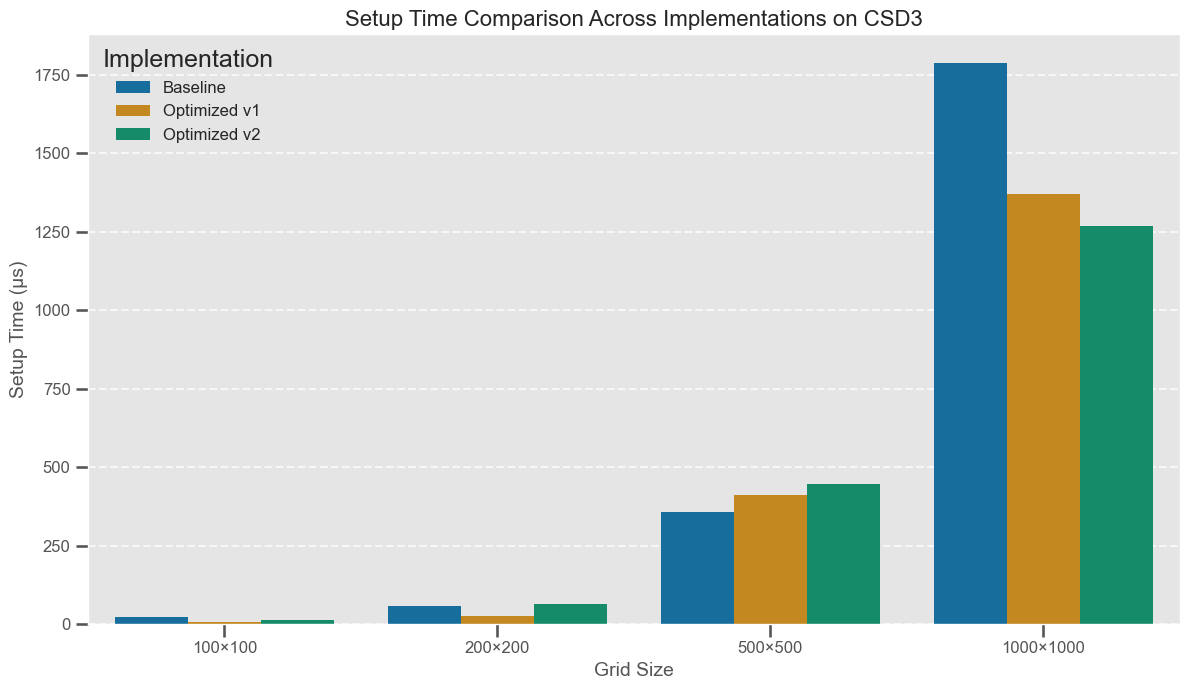

In [106]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Grid Size', y='Setup Time (μs)', hue='Implementation')
plt.title('Setup Time Comparison Across Implementations on CSD3', fontsize=16)
plt.xlabel('Grid Size', fontsize=14)
plt.ylabel('Setup Time (μs)', fontsize=14)
plt.xticks(ticks=range(4), labels=[f'{s}×{s}' for s in grid_sizes])
plt.legend(title='Implementation', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('setup_time_comparison_csd3.png', dpi=300)
plt.show()

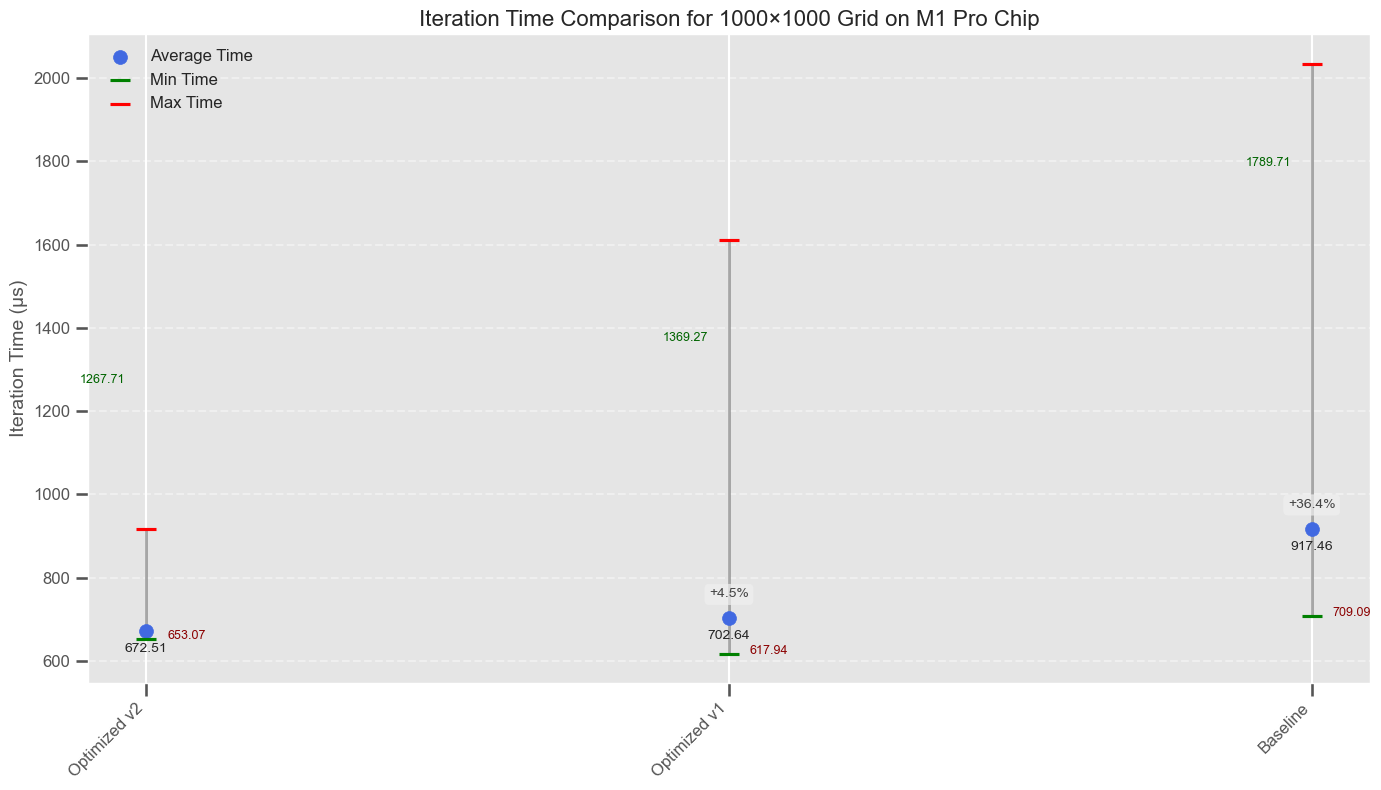

In [107]:
# Improved Iteration Time Visualization: Lollipop Chart with Range
plt.figure(figsize=(14, 8))
# Filter for 1000x1000 grid size
df_1000 = df[df['Grid Size'] == 1000].copy()

# Sort implementations by average iteration time for better visualization
df_1000_sorted = df_1000.sort_values('Avg Iter Time (μs)')

# Create the lollipop chart
plt.vlines(x=range(len(df_1000_sorted)), 
           ymin=df_1000_sorted['Min Iter Time (μs)'], 
           ymax=df_1000_sorted['Max Iter Time (μs)'], 
           color='grey', alpha=0.7, linewidth=2)

plt.scatter(range(len(df_1000_sorted)), df_1000_sorted['Avg Iter Time (μs)'],
            color='royalblue', s=100, zorder=3, label='Average Time')
plt.scatter(range(len(df_1000_sorted)), df_1000_sorted['Min Iter Time (μs)'],
            color='green', marker='_', s=200, zorder=3, label='Min Time')
plt.scatter(range(len(df_1000_sorted)), df_1000_sorted['Max Iter Time (μs)'],
            color='red', marker='_', s=200, zorder=3, label='Max Time')

# Add annotations
for i, row in enumerate(df_1000_sorted.itertuples()):
    # Annotate average time
    plt.annotate(f'{row._4:.2f}', # Avg time
                xy=(i, row._4),
                xytext=(0, -15),
                textcoords='offset points',
                ha='center', fontsize=10)
    
    # Annotate min time
    plt.annotate(f'{row._3:.2f}', # Min time 
                xy=(i, row._3),
                xytext=(-15, 0),
                textcoords='offset points',
                ha='right', fontsize=9, color='darkgreen')
    
    # Annotate max time
    plt.annotate(f'{row._5:.2f}', # Max time
                xy=(i, row._5),
                xytext=(15, 0),
                textcoords='offset points',
                ha='left', fontsize=9, color='darkred')

plt.xticks(range(len(df_1000_sorted)), df_1000_sorted['Implementation'], rotation=45, ha='right')
plt.ylabel('Iteration Time (μs)', fontsize=14)
plt.title('Iteration Time Comparison for 1000×1000 Grid on M1 Pro Chip', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()

# Add percent difference from best implementation
min_avg_time = df_1000_sorted['Avg Iter Time (μs)'].min()
for i, row in enumerate(df_1000_sorted.itertuples()):
    if i > 0:  # Skip the best implementation
        pct_diff = ((row._4 - min_avg_time) / min_avg_time) * 100
        plt.annotate(f'+{pct_diff:.1f}%',
                   xy=(i, row._4),
                   xytext=(0, 15),
                   textcoords='offset points',
                   ha='center', fontsize=10, color='#444444',
                   bbox=dict(boxstyle='round,pad=0.3', fc='#F0F0F0', alpha=0.7))

plt.tight_layout()
plt.savefig('iteration_time_lollipop_analysis.png', dpi=300)
plt.show()

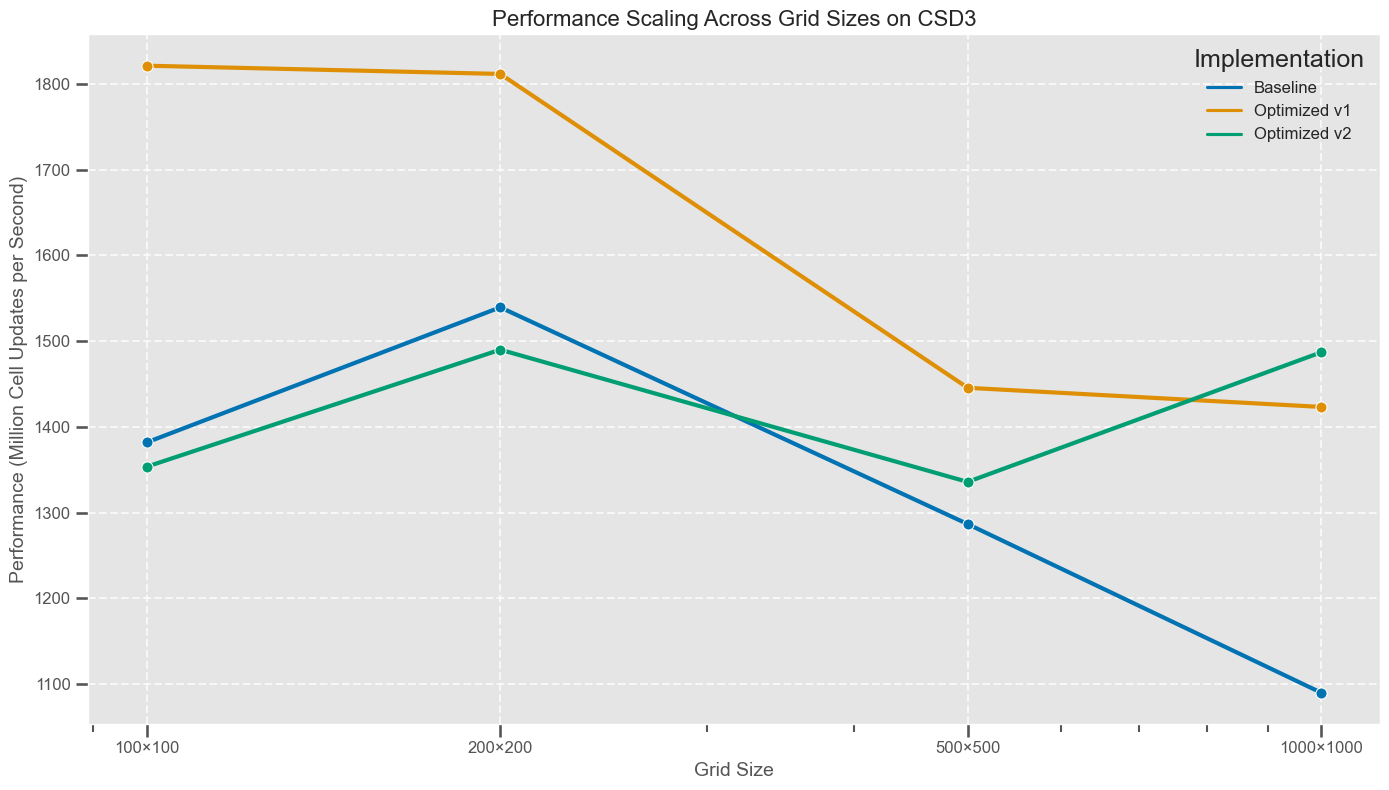

In [108]:
# 3. Performance scaling across grid sizes
plt.figure(figsize=(14, 8))

# Calculate performance in cell updates per second
for idx, row in df.iterrows():
    grid_size = row['Grid Size']
    df.loc[idx, 'Performance (MCUPS)'] = (grid_size * grid_size * 1000) / (row['Avg Iter Time (μs)']/1000 * 1e6)

sns.lineplot(data=df, x='Grid Size', y='Performance (MCUPS)', hue='Implementation', 
             marker='o', markersize=8, linewidth=3)

plt.title('Performance Scaling Across Grid Sizes on CSD3', fontsize=16)
plt.xlabel('Grid Size', fontsize=14)
plt.ylabel('Performance (Million Cell Updates per Second)', fontsize=14)
plt.xscale('log')
plt.xticks(grid_sizes, [f'{s}×{s}' for s in grid_sizes])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Implementation', fontsize=12)
plt.tight_layout()
plt.savefig('performance_scaling_csd3.png', dpi=300)
plt.show()

## Parallization

In [55]:
# Extract MPI strong scaling data
mpi_strong_ranks = [2, 4, 8, 16, 32, 64]  # Missing rank 1 in the data
mpi_strong_times = [3.87988, 4.03494, 1.5717, 0.343465, 0.179407, 0.0946808]  # Average iteration time in ms

# Extract OpenMP strong scaling data
omp_strong_threads = [1, 2, 4, 8, 16, 32, 64]
omp_strong_times = [4.26213, 2.16853, 0.817763, 0.422874, 0.259791, 0.504774, 0.578586]  # Average iteration time in ms

# Extract MPI weak scaling data
mpi_weak_ranks = [1, 2, 4, 8, 16, 32, 64]
mpi_weak_times = [0.0454092, 0.0471944, 0.0587606, 0.0584994, 0.0558985, 0.0709603, 0.0677147]  # Average iteration time in ms
mpi_weak_grid_sizes = ["200x200", "282x282", "400x400", "565x565", "800x800", "1131x1131", "1600x1600"]

# Extract OpenMP weak scaling data
omp_weak_threads = [1, 2, 4, 8, 16, 32, 64]
omp_weak_times = [0.0250612, 0.0265619, 0.0849808, 0.0295977, 0.785867, 0.28835, 0.449804]  # Average iteration time in ms
omp_weak_grid_sizes = ["200x200", "282x282", "400x400", "565x565", "800x800", "1131x1131", "1600x1600"]



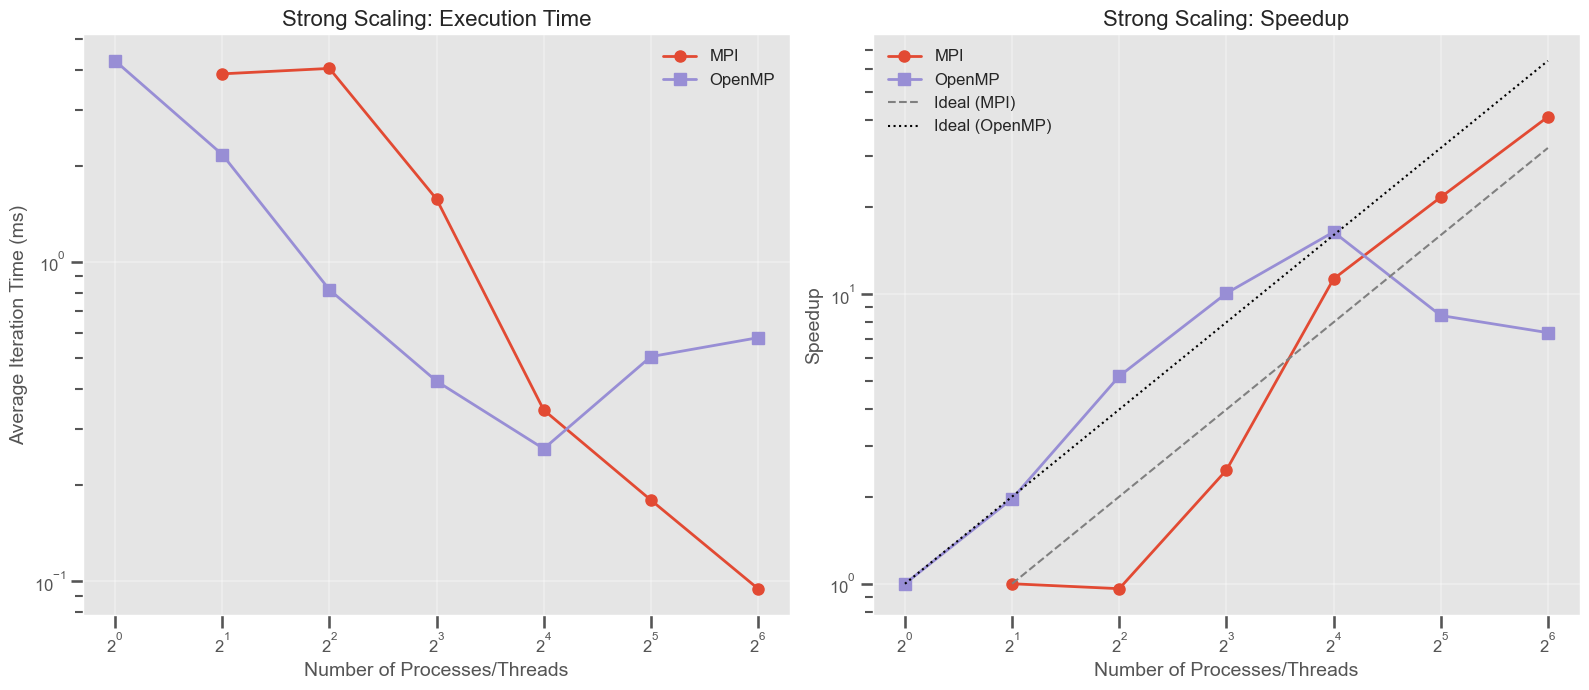

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Execution time vs ranks/threads
ax1.plot(mpi_strong_ranks, mpi_strong_times, 'o-', color=colors[0], linewidth=2, markersize=8, label='MPI')
ax1.plot(omp_strong_threads, omp_strong_times, 's-', color=colors[1], linewidth=2, markersize=8, label='OpenMP')
ax1.set_title('Strong Scaling: Execution Time', fontsize=16)
ax1.set_xlabel('Number of Processes/Threads', fontsize=14)
ax1.set_ylabel('Average Iteration Time (ms)', fontsize=14)
ax1.set_xscale('log', base=2)
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)

# Calculate speedup
mpi_speedup = [mpi_strong_times[0] / time for time in mpi_strong_times]
omp_speedup = [omp_strong_times[0] / time for time in omp_strong_times]

# Ideal speedup (linear)
ideal_speedup_mpi = [mpi_strong_ranks[i] / mpi_strong_ranks[0] for i in range(len(mpi_strong_ranks))]
ideal_speedup_omp = [omp_strong_threads[i] / omp_strong_threads[0] for i in range(len(omp_strong_threads))]

ax2.plot(mpi_strong_ranks, mpi_speedup, 'o-', color=colors[0], linewidth=2, markersize=8, label='MPI')
ax2.plot(omp_strong_threads, omp_speedup, 's-', color=colors[1], linewidth=2, markersize=8, label='OpenMP')
ax2.plot(mpi_strong_ranks, ideal_speedup_mpi, '--', color='gray', linewidth=1.5, label='Ideal (MPI)')
ax2.plot(omp_strong_threads, ideal_speedup_omp, ':', color='black', linewidth=1.5, label='Ideal (OpenMP)')
ax2.set_title('Strong Scaling: Speedup', fontsize=16)
ax2.set_xlabel('Number of Processes/Threads', fontsize=14)
ax2.set_ylabel('Speedup', fontsize=14)
ax2.set_xscale('log', base=2)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12)

plt.savefig('strong_scaling_comparison_csd3.png', dpi=300)
plt.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


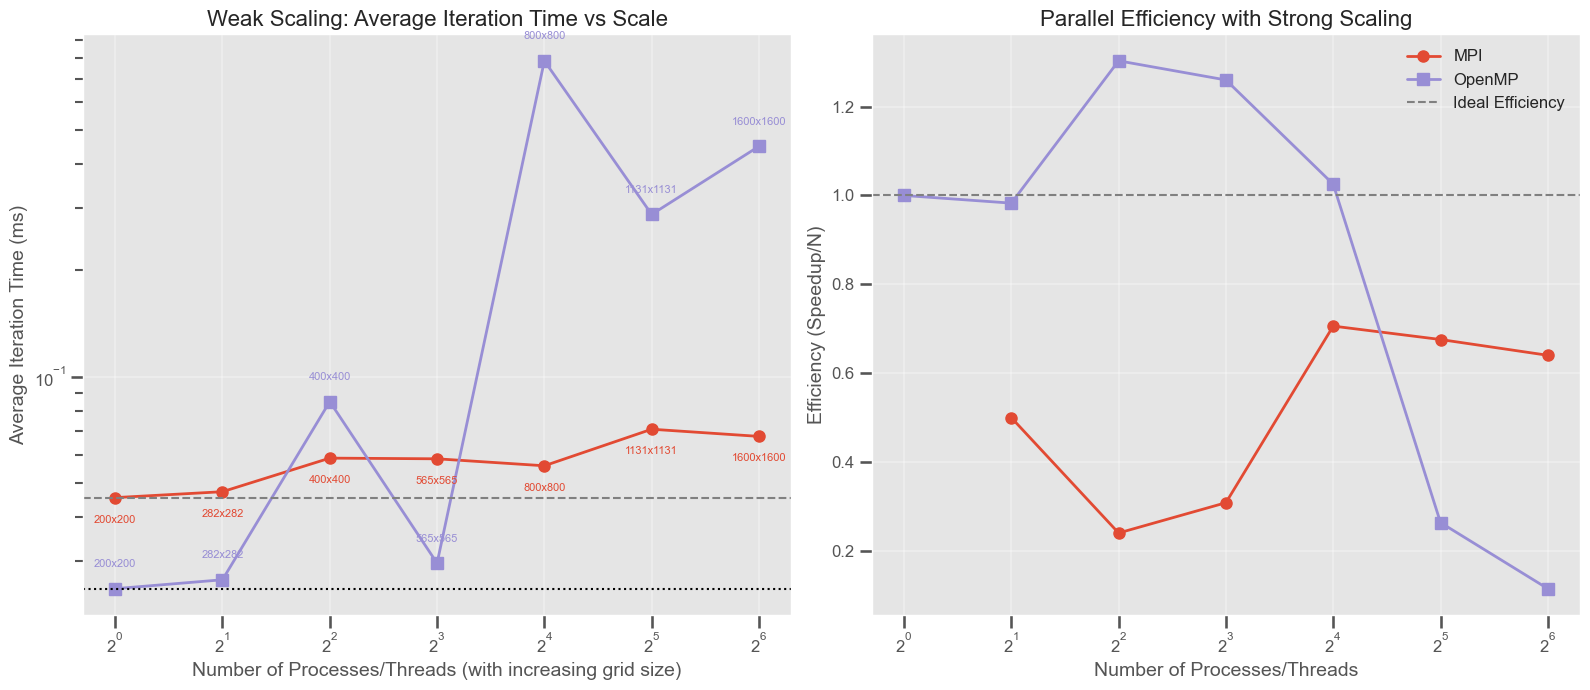

In [57]:
# 2. Weak Scaling Comparison: MPI vs OpenMP
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

ax1.plot(mpi_weak_ranks, mpi_weak_times, 'o-', color=colors[0], linewidth=2, markersize=8, label='MPI')
ax1.plot(omp_weak_threads, omp_weak_times, 's-', color=colors[1], linewidth=2, markersize=8, label='OpenMP')

# Ideal weak scaling (horizontal line at the first time value)
ax1.axhline(y=mpi_weak_times[0], linestyle='--', color='gray', linewidth=1.5, label='Ideal (MPI)')
ax1.axhline(y=omp_weak_times[0], linestyle=':', color='black', linewidth=1.5, label='Ideal (OpenMP)')

ax1.set_title('Weak Scaling: Average Iteration Time vs Scale', fontsize=16)
ax1.set_xlabel('Number of Processes/Threads (with increasing grid size)', fontsize=14)
ax1.set_ylabel('Average Iteration Time (ms)', fontsize=14)
ax1.set_xscale('log', base=2)
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)

# Add grid sizes as text below the corresponding points
for i, (rank, time) in enumerate(zip(mpi_weak_ranks, mpi_weak_times)):
    ax1.text(rank, time*0.85, mpi_weak_grid_sizes[i], fontsize=8, ha='center', color=colors[0])
    
for i, (thread, time) in enumerate(zip(omp_weak_threads, omp_weak_times)):
    ax1.text(thread, time*1.15, omp_weak_grid_sizes[i], fontsize=8, ha='center', color=colors[1])

ax2.legend(fontsize=12)

mpi_efficiency = [mpi_speedup[i]/mpi_strong_ranks[i] for i in range(len(mpi_strong_ranks))]
omp_efficiency = [omp_speedup[i]/omp_strong_threads[i] for i in range(len(omp_strong_threads))]

ax2.plot(mpi_strong_ranks, mpi_efficiency, 'o-', color=colors[0], linewidth=2, markersize=8, label='MPI')
ax2.plot(omp_strong_threads, omp_efficiency, 's-', color=colors[1], linewidth=2, markersize=8, label='OpenMP')

# Ideal efficiency (horizontal line at 1.0)
ax2.axhline(y=1.0, linestyle='--', color='gray', linewidth=1.5, label='Ideal Efficiency')

ax2.set_title('Parallel Efficiency with Strong Scaling', fontsize=16)
ax2.set_xlabel('Number of Processes/Threads', fontsize=14)
ax2.set_ylabel('Efficiency (Speedup/N)', fontsize=14)
ax2.set_xscale('log', base=2)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.savefig('weak_scaling_comparison_csd3.png', dpi=300)


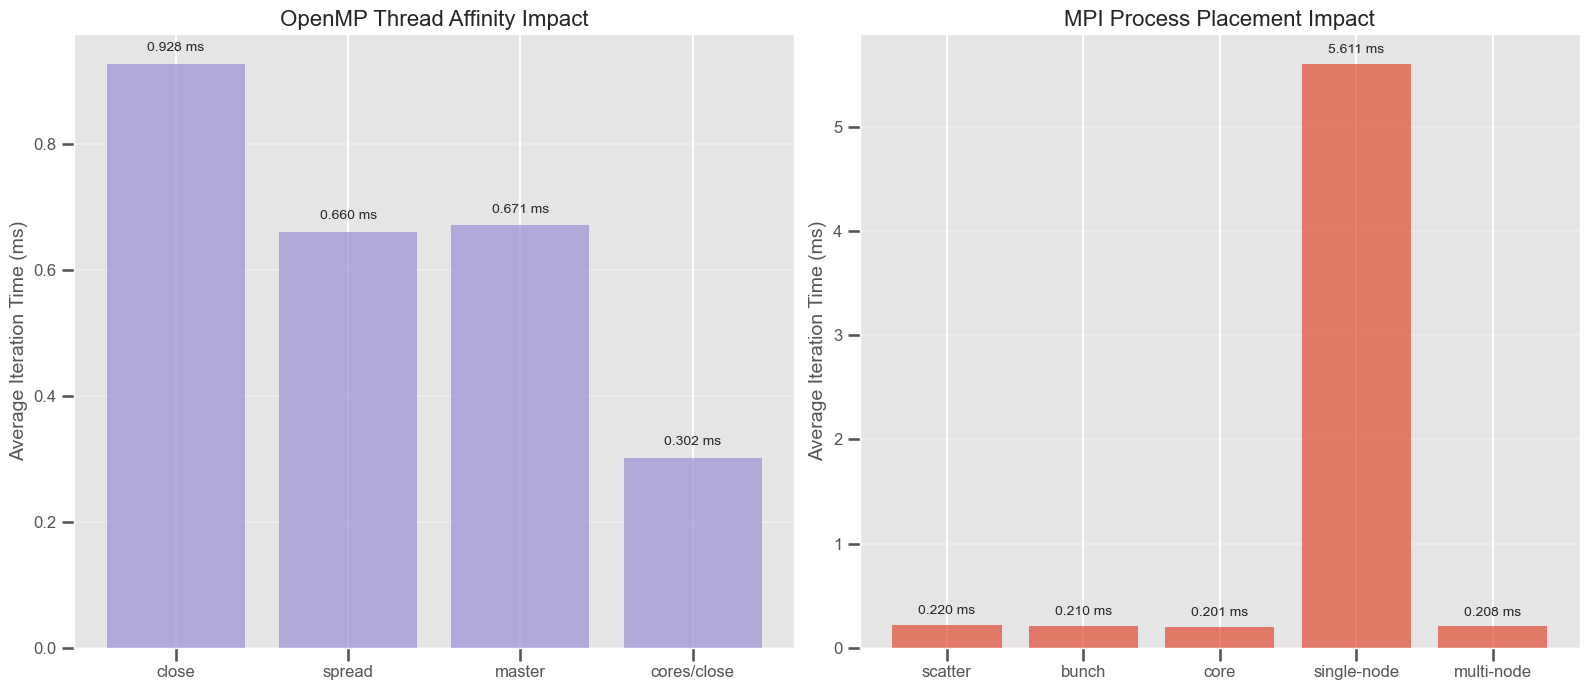

In [58]:
# OpenMP Thread Affinity
omp_affinity_types = ["close", "spread", "master", "cores/close"]
omp_affinity_times = [0.927671, 0.660453, 0.670834, 0.30176]

# MPI Process Placement
mpi_placement_types = ["scatter", "bunch", "core", "single-node", "multi-node"]
mpi_placement_times = [0.219525, 0.210098, 0.201195, 5.61068, 0.207927]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# OpenMP Thread Affinity
ax1.bar(omp_affinity_types, omp_affinity_times, color=colors[1], alpha=0.7)
ax1.set_title('OpenMP Thread Affinity Impact', fontsize=16)
ax1.set_ylabel('Average Iteration Time (ms)', fontsize=14)
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(omp_affinity_times):
    ax1.text(i, v + 0.02, f"{v:.3f} ms", ha='center', fontsize=10)

# MPI Process Placement
ax2.bar(mpi_placement_types, mpi_placement_times, color=colors[0], alpha=0.7)
ax2.set_title('MPI Process Placement Impact', fontsize=16)
ax2.set_ylabel('Average Iteration Time (ms)', fontsize=14)
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(mpi_placement_times):
    ax2.text(i, v + 0.1, f"{v:.3f} ms", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('placement_affinity_comparison_csd3.png', dpi=300)

## Hybrid

In [59]:
# Job ID: 7525451
# Nodes: 2
# Node Names: cpu-q-177 cpu-q-303
# CPU Cores Total: 76
# CPU Cores Per Node: 76 (Icelake)
# MPI Implementation: Intel(R) MPI Library for Linux* OS, Version 2021.6 Build 20220227 (id: 28877f3f32)
# Intel Compiler: icc (ICC) 2021.6.0 20220226

In [60]:
# Strong scaling data for fixed 5000×5000 grid
#single node
configs = ['2p×38t', '4p×19t', '8p×9t', '19p×4t', '38p×2t', '76p×1t']
times = [910.809, 3611.45, 4043.23, 4865.02, 5872.32, 8709.27]
performance = [1.37241e+09, 3.46122e+08, 3.09159e+08, 2.56936e+08, 2.12863e+08, 1.43525e+08]
total_cores = [76, 76, 72, 76, 76, 76]  # Total cores used in each configuration

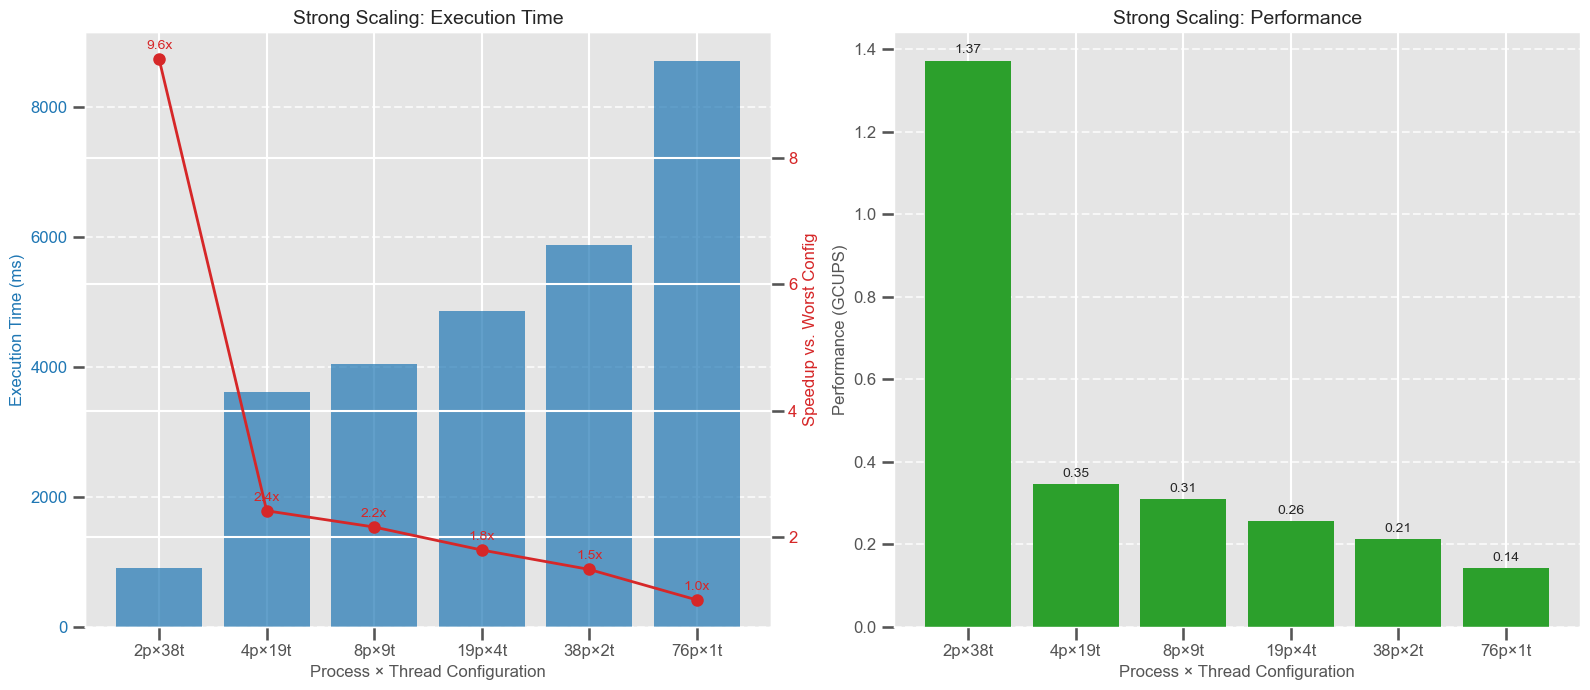

In [61]:
# Calculate speedup relative to worst configuration
speedups = [max(times)/t for t in times]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Execution Time and Speedup
color1 = 'tab:blue'
ax1.set_xlabel('Process × Thread Configuration', fontsize=12)
ax1.set_ylabel('Execution Time (ms)', color=color1, fontsize=12)
bars = ax1.bar(configs, times, color=color1, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title('Strong Scaling: Execution Time', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add a second y-axis for speedup
ax1b = ax1.twinx()
color2 = 'tab:red'
ax1b.set_ylabel('Speedup vs. Worst Config', color=color2, fontsize=12)
ax1b.plot(configs, speedups, 'o-', color=color2, linewidth=2, markersize=8)
ax1b.tick_params(axis='y', labelcolor=color2)
# Plot 2: Performance (GCUPS)
ax2.set_xlabel('Process × Thread Configuration', fontsize=12)
ax2.set_ylabel('Performance (GCUPS)', fontsize=12)
bars2 = ax2.bar(configs, [p/1e9 for p in performance], color='tab:green')
ax2.set_title('Strong Scaling: Performance', fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Add speedup labels
for i, (x, y) in enumerate(zip(configs, speedups)):
    ax1b.annotate(f'{y:.1f}x',
                xy=(i, y), 
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', color='tab:red')

plt.tight_layout()
plt.savefig('strong_scaling_hybrid_csd3.png', dpi=300, bbox_inches='tight')
plt.show()


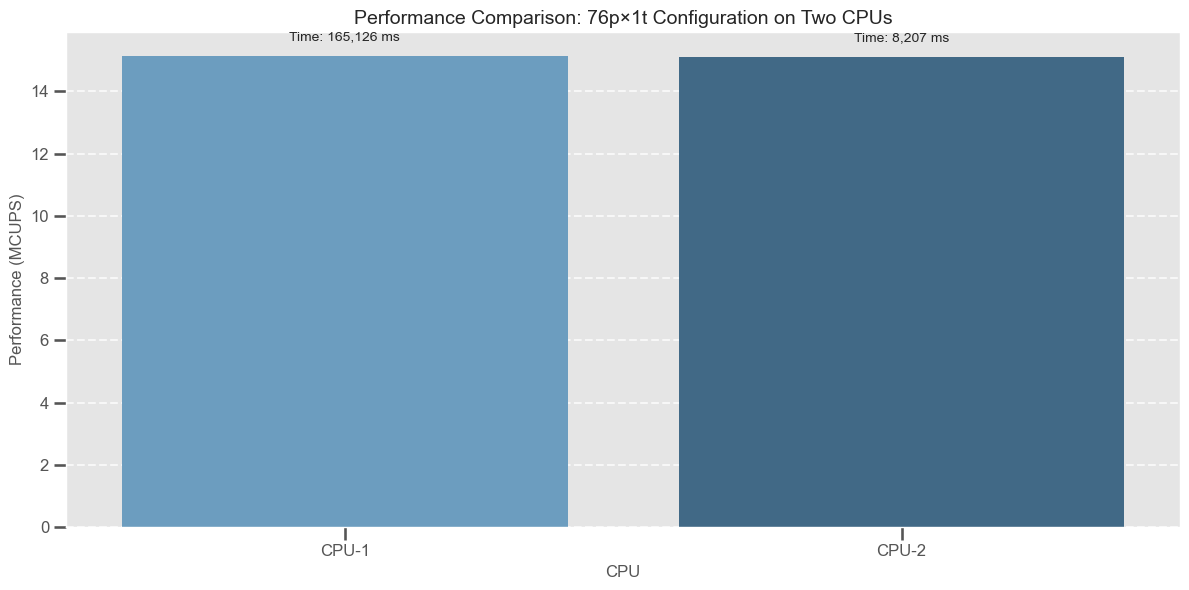

In [62]:
# Create DataFrame with both CPU results
cpu_comparison = pd.DataFrame({
    'CPU': ['CPU-1', 'CPU-2'],
    'Node Name': ['cpu-q-177', 'cpu-q-303'],  # Example node names
    'Config': ['76p×1t', '76p×1t'],
    'Execution Time (ms)': [165126, 8206.64],  
    'Performance (MCUPS)': [15.14, 15.11]     # Example calculated performances
})

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='CPU', y='Performance (MCUPS)', data=cpu_comparison, palette='Blues_d')
plt.title('Performance Comparison: 76p×1t Configuration on Two CPUs', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add time labels above bars
for i, row in cpu_comparison.iterrows():
    plt.text(i, row['Performance (MCUPS)']+0.5, 
             f"Time: {row['Execution Time (ms)']:,.0f} ms", 
             ha='center', fontsize=10)

plt.tight_layout()

In [63]:
# Sample data as dictionaries (representing parsed CSV data)
#on two nodes
process_thread_data = {
    'config': ['76p×1t','152p×1t', '128p*1t','38p×2t', '19p×4t', '8p×19t', '4p×38t', '2p×76t'],
    'processes': [76, 152, 128, 38, 19, 8, 4, 2],
    'threads_per_process': [1, 1,1, 2, 4, 19, 38, 76],
    'total_cores': [76,152,128, 76, 76, 152, 152, 152],
    'execution_time': [32431.7, 165471, 143074 ,92784.9, 7574.96, 210604, 162463, 13083.4],
    'performance': [7.71e8, 1.51e8, 1.75e8,2.70e8, 3.30e+9, 1.19e8, 1.54e8, 1.91e9]
}

fabric_data = {
    'fabric': ['shm:ofi', 'shm:dapl', 'shm:tcp'],
    'processes': [16, 16, 16],
    'threads': [4, 4, 4],
    'execution_time': [95116.1, 95023.2, 94828.1],
    'performance': [2.63e8, 2.63e8, 2.64e8]
}

problem_size_data = {
    'grid_size': [1000, 2000, 4000, 8000],
    'processes': [16, 16, 16, 16],
    'threads': [8, 8, 8, 8],
    'execution_time': [13796.1, 9735.17, 17490, 20121.2],
    'performance': [7.25e6, 4.11e7, 9.15e7, 1.05e8]
}

# Create DataFrames from dictionaries
df_pt = pd.DataFrame(process_thread_data)
df_fabric = pd.DataFrame(fabric_data)
df_size = pd.DataFrame(problem_size_data)

In [64]:
def visualize_process_thread_balance(df):
    """
    Visualize process-thread balance using a DataFrame.
    
    Args:
        df: DataFrame with columns 'config', 'execution_time', 'performance'
    """
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    # Sort by execution time for better visualization
    df = df.sort_values('execution_time')
    
    # Plot execution time bars
    bars = ax1.bar(df['config'], df['execution_time'], color='skyblue', edgecolor='navy')
    ax1.set_ylabel('Execution Time (ms)', color='navy', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='navy')
    ax1.set_title('Process-Thread Balance Analysis', fontsize=16)
    
    # Add performance line on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df['config'], df['performance']/1e9, 'ro-', linewidth=2, markersize=8)
    ax2.set_ylabel('Performance (GCUPS)', color='red', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Add execution time labels
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:,.0f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return fig

In [65]:
def visualize_fabric_comparison(df):
    """
    Visualize the impact of different MPI fabrics.
    
    Args:
        df: DataFrame with columns 'fabric', 'execution_time'
    """
    # Sort by execution time
    df = df.sort_values('execution_time')
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    bars = ax.bar(df['fabric'], df['execution_time'], color='salmon', edgecolor='darkred')
    ax.set_ylabel('Execution Time (ms)', fontsize=12)
    ax.set_title('Impact of MPI Fabric Type on Performance', fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add percentage labels relative to best performer
    min_time = df['execution_time'].min()
    
    for bar in bars:
        height = bar.get_height()
        pct_diff = ((height - min_time) / min_time) * 100
        label = f'+{pct_diff:.2f}%' if pct_diff > 0 else '0.00%'
        ax.annotate(label,
                   xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom')
    
    plt.tight_layout()
    return fig

In [66]:
def visualize_problem_size_scaling(df):
    """
    Visualize performance scaling with different problem sizes.
    
    Args:
        df: DataFrame with columns 'grid_size', 'execution_time', 'performance'
    """
    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    # Sort by grid size
    df = df.sort_values('grid_size')
    
    # Plot execution time
    ax1.plot(df['grid_size'], df['execution_time'], 'bo-', linewidth=2, markersize=8, label='Time')
    ax1.set_xlabel('Grid Size', fontsize=12)
    ax1.set_ylabel('Execution Time (ms)', color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Add data labels
    for x, y in zip(df['grid_size'], df['execution_time']):
        ax1.annotate(f'{y:,.1f}',
                    xy=(x, y),
                    xytext=(0, 10), textcoords="offset points",
                    ha='center', fontsize=9)
    
    # Add second y-axis for performance
    ax2 = ax1.twinx()
    ax2.plot(df['grid_size'], df['performance']/1e6, 'rs-', linewidth=2, markersize=8, label='Performance')
    ax2.set_ylabel('Performance (MCUPS)', color='red', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Add data labels
    for x, y in zip(df['grid_size'], df['performance']/1e6):
        ax2.annotate(f'{y:.2f}',
                    xy=(x, y),
                    xytext=(0, -10), textcoords="offset points",
                    ha='center', fontsize=9, color='red')
    
    plt.title('Problem Size Scaling Analysis', fontsize=14)
    plt.xscale('log', base=2)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return fig

/var/folders/wg/h6z2ybxs0bnfsz9zc363lx_w0000gn/T/ipykernel_66207/2063687992.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sorted_df['config'], rotation=45, ha='right')


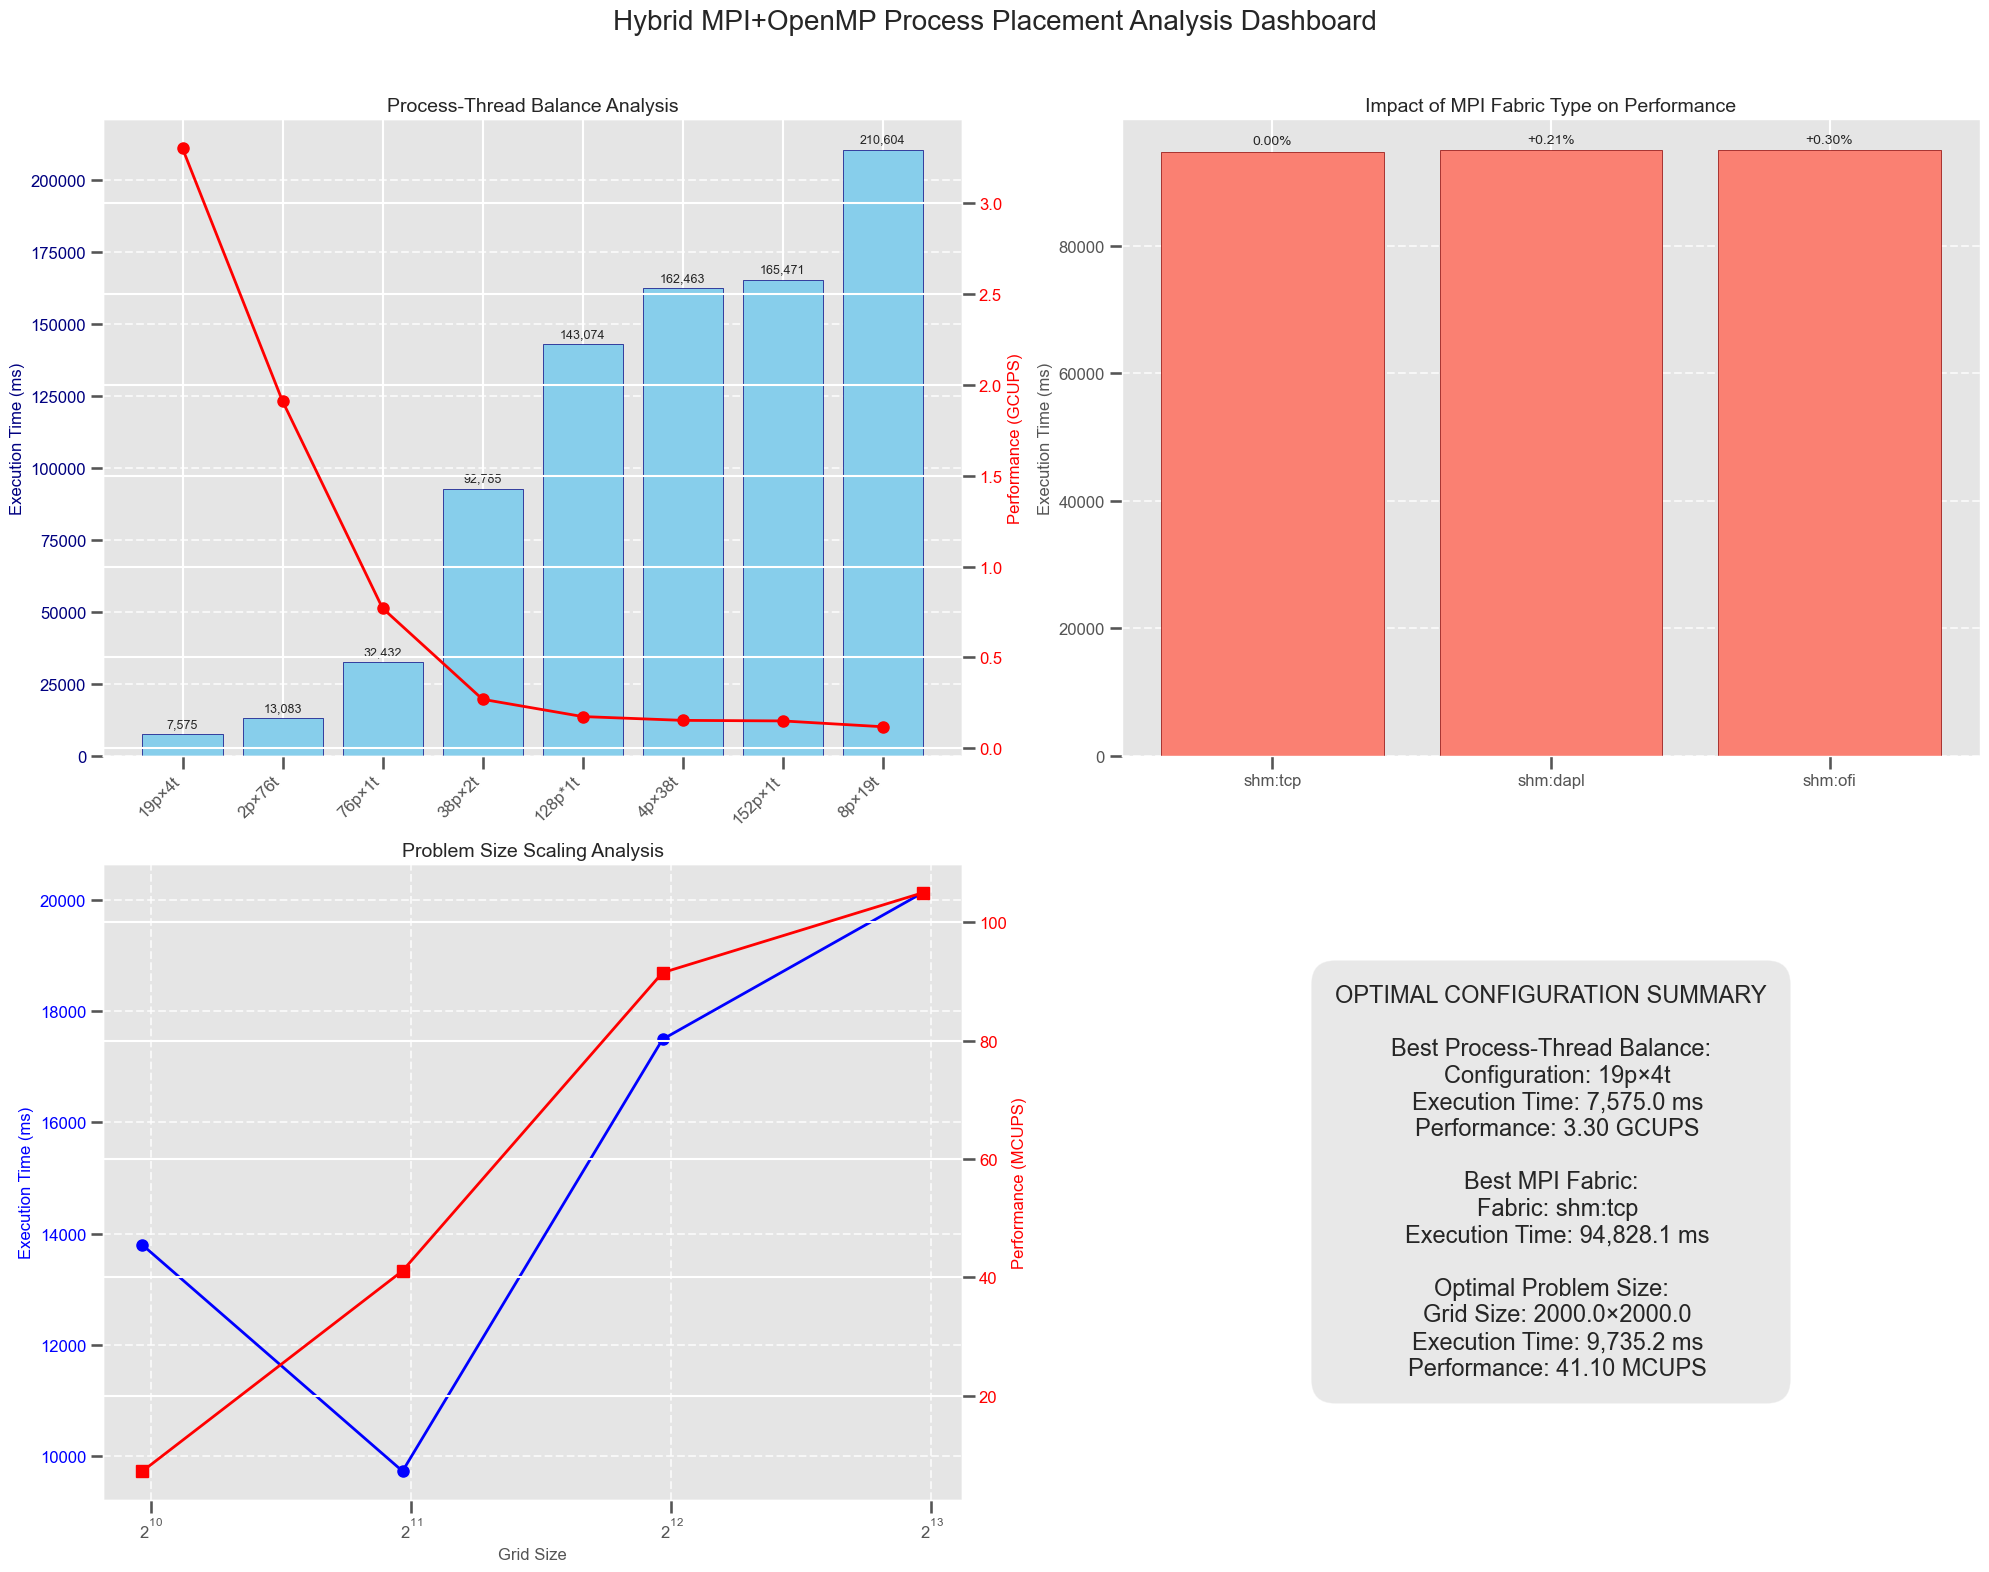

In [67]:
def create_placement_dashboard(df_pt, df_fabric, df_size):
    """
    Create a comprehensive dashboard with all visualizations.
    
    Args:
        df_pt: Process-thread balance DataFrame
        df_fabric: Fabric comparison DataFrame
        df_size: Problem size scaling DataFrame
    """
    # Create figure with grid layout
    fig = plt.figure(figsize=(20, 16))
    gs = plt.GridSpec(2, 2, figure=fig)
    
    # Process-Thread Balance (top left)
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Sort by execution time for better visualization
    sorted_df = df_pt.sort_values('execution_time')
    
    # Plot execution time bars
    bars = ax1.bar(sorted_df['config'], sorted_df['execution_time'], color='skyblue', edgecolor='navy')
    ax1.set_ylabel('Execution Time (ms)', color='navy', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='navy')
    ax1.set_title('Process-Thread Balance Analysis', fontsize=14)
    ax1.set_xticklabels(sorted_df['config'], rotation=45, ha='right')
    
    # Add performance line on secondary y-axis
    ax1b = ax1.twinx()
    ax1b.plot(sorted_df['config'], sorted_df['performance']/1e9, 'ro-', linewidth=2, markersize=8)
    ax1b.set_ylabel('Performance (GCUPS)', color='red', fontsize=12)
    ax1b.tick_params(axis='y', labelcolor='red')
    
    # Add execution time labels
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:,.0f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
    
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Fabric Comparison (top right)
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Sort by execution time
    sorted_fabric = df_fabric.sort_values('execution_time')
    
    bars2 = ax2.bar(sorted_fabric['fabric'], sorted_fabric['execution_time'], color='salmon', edgecolor='darkred')
    ax2.set_ylabel('Execution Time (ms)', fontsize=12)
    ax2.set_title('Impact of MPI Fabric Type on Performance', fontsize=14)
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add percentage labels relative to best performer
    min_time = sorted_fabric['execution_time'].min()
    
    for bar in bars2:
        height = bar.get_height()
        pct_diff = ((height - min_time) / min_time) * 100
        label = f'+{pct_diff:.2f}%' if pct_diff > 0 else '0.00%'
        ax2.annotate(label,
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')
    
    # Problem Size Scaling (bottom left)
    ax3 = fig.add_subplot(gs[1, 0])
    
    # Sort by grid size
    sorted_size = df_size.sort_values('grid_size')
    
    # Plot execution time
    ax3.plot(sorted_size['grid_size'], sorted_size['execution_time'], 'bo-', linewidth=2, markersize=8)
    ax3.set_xlabel('Grid Size', fontsize=12)
    ax3.set_ylabel('Execution Time (ms)', color='blue', fontsize=12)
    ax3.tick_params(axis='y', labelcolor='blue')
    
    # Add second y-axis for performance
    ax3b = ax3.twinx()
    ax3b.plot(sorted_size['grid_size'], sorted_size['performance']/1e6, 'rs-', linewidth=2, markersize=8)
    ax3b.set_ylabel('Performance (MCUPS)', color='red', fontsize=12)
    ax3b.tick_params(axis='y', labelcolor='red')
    
    ax3.set_title('Problem Size Scaling Analysis', fontsize=14)
    ax3.set_xscale('log', base=2)
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    # Summary/Highlights (bottom right)
    ax4 = fig.add_subplot(gs[1, 1])
    
    # Get the best configurations
    best_pt = df_pt.loc[df_pt['execution_time'].idxmin()]
    best_fabric = df_fabric.loc[df_fabric['execution_time'].idxmin()]
    best_size = df_size.loc[df_size['execution_time'].idxmin()]
    
    # Create a summary text
    summary = (
        "OPTIMAL CONFIGURATION SUMMARY\n\n"
        f"Best Process-Thread Balance:\n"
        f"  Configuration: {best_pt['config']}\n"
        f"  Execution Time: {best_pt['execution_time']:,.1f} ms\n"
        f"  Performance: {best_pt['performance']/1e9:.2f} GCUPS\n\n"
        f"Best MPI Fabric:\n"
        f"  Fabric: {best_fabric['fabric']}\n"
        f"  Execution Time: {best_fabric['execution_time']:,.1f} ms\n\n"
        f"Optimal Problem Size:\n"
        f"  Grid Size: {best_size['grid_size']}×{best_size['grid_size']}\n"
        f"  Execution Time: {best_size['execution_time']:,.1f} ms\n"
        f"  Performance: {best_size['performance']/1e6:.2f} MCUPS"
    )
    
    # Display text
    ax4.text(0.5, 0.5, summary, ha='center', va='center', fontsize=17,
            bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=1'))
    ax4.axis('off')
    
    # Main title
    plt.suptitle('Hybrid MPI+OpenMP Process Placement Analysis Dashboard', fontsize=20, y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return fig

# Create and display the dashboard
dashboard = create_placement_dashboard(df_pt, df_fabric, df_size)
plt.savefig('process_placement_dashboard_csd3.png', dpi=300, bbox_inches='tight')

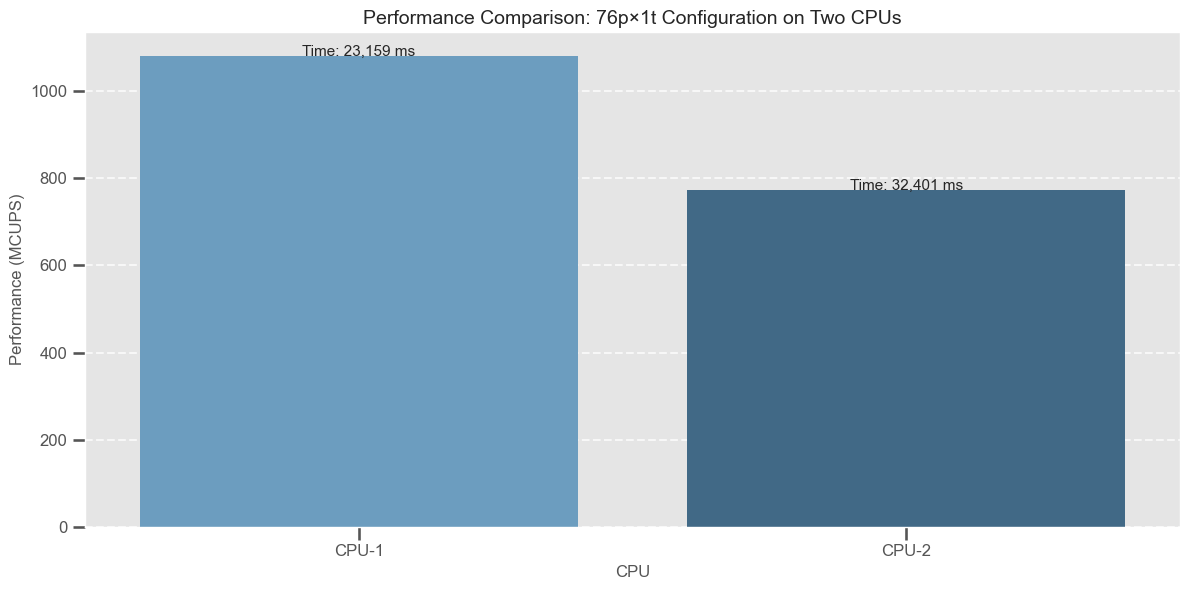

In [68]:
#seperate test
cpu_comparison = pd.DataFrame({
    'CPU': ['CPU-1', 'CPU-2'],
    'Node Name': ['cpu-q-160', 'cpu-q-162'],  
    'Config': ['76p×1t', '76p×1t'],
    'Execution Time (ms)': [23158.8, 32400.9], 
    'Performance (MCUPS)': [1080, 772]     
})

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='CPU', y='Performance (MCUPS)', data=cpu_comparison, palette='Blues_d')
plt.title('Performance Comparison: 76p×1t Configuration on Two CPUs', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add time labels above bars
for i, row in cpu_comparison.iterrows():
    plt.text(i, row['Performance (MCUPS)']+0.5, 
             f"Time: {row['Execution Time (ms)']:,.0f} ms", 
             ha='center', fontsize=11)

plt.tight_layout()